<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Funciones y bases de datos**

In [1]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-05-19 14:12:38--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 172.217.193.102, 172.217.193.101, 172.217.193.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.193.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-8o-docs.googleusercontent.com/docs/securesc/5ntqlcvqedgortsjjt6r0dggbsem29o4/1cvg7vji3p3dc5idjci3o7jhgkh4elel/1589897550000/11146100322577758036/01009610535759044546Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-05-19 14:12:38--  https://doc-0g-8o-docs.googleusercontent.com/docs/securesc/5ntqlcvqedgortsjjt6r0dggbsem29o4/1cvg7vji3p3dc5idjci3o7jhgkh4elel/1589897550000/11146100322577758036/01009610535759044546Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-0g-8o-docs.googleusercontent.com (doc-0g-8o-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connectin

**Añadir Carpeta de funciones y bases de datos**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import shutil
import numpy as np
import math as math
import pandas as pd
import scipy.io as sio
from sklearn import datasets
from joblib import dump,load
from main_functions import *
from google.colab import files
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import date, datetime
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin
from sklearn.metrics import accuracy_score,confusion_matrix,jaccard_score

## **Sin ruido**
**Validacion de la metodologia**

**Happy**

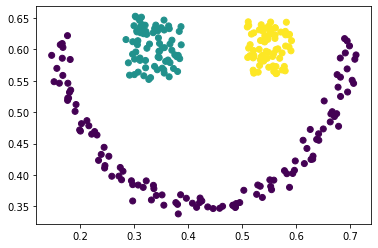

In [0]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Crear conjunto de train y test**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)

# **Punto Fijo**

**Reduccion con Kmeans**

el tiempo requerido fue:2.2801971435546875sg
Ari: 0.35925576609791654 y accuracy: 0.7037037037037037


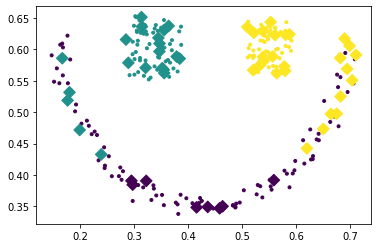

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='Kmeans')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

****Reduccion con Spectral Clustering****

el tiempo requerido fue:2.07704758644104sg
Ari: 1.0 y accuracy: 1.0


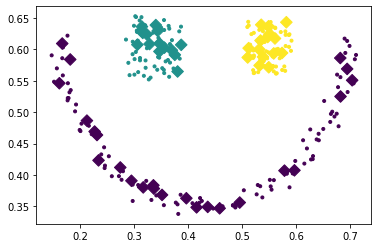

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.8921277523040771sg
Ari: 1.0 y accuracy: 1.0


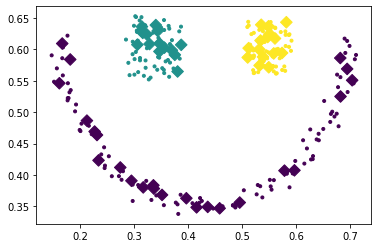

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=4, sigma_initial=35,reduction_='SC',gamma_=1000,n_clusters=3)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Adam**

el tiempo requerido fue:0.9094944000244141sg
Ari: 1.0 y accuracy: 1.0


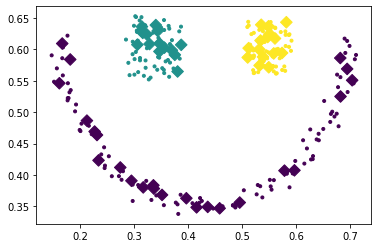

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=20,optimization='Adam',reduction_='SC',gamma_=1000)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Nadam**

el tiempo requerido fue:0.8795266151428223sg
Ari: 1.0 y accuracy: 1.0


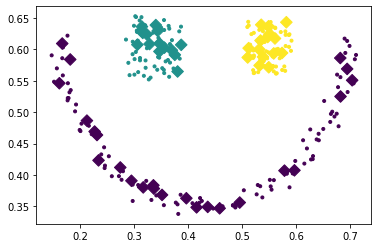

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=30,learning_rate=0.002,optimization='Nadam',reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Kmeans**

el tiempo requerido fue:0.06073617935180664sg
Ari: 0.3866953538407862 y accuracy: 0.7407407407407407


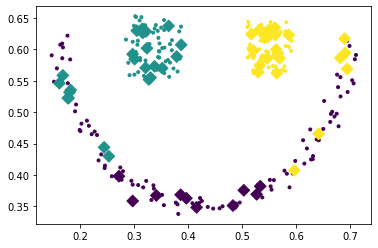

In [0]:
t = time.time()
p = Kmeans( n_clusters_=3)
p.fit(X_train, y_train)
labels_pre_Km= p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_Km, marker='D',s=68)
Rari_Km=adjusted_rand_score(y_test,labels_pre_Km)
Racc_Km=accuracy_score(y_test,labels_pre_Km)
print('Ari: '+str(Rari_Km)+' y'+' accuracy: '+str(Racc_Km))

**Spectral Clustering**

el tiempo requerido fue:0.063720703125sg
Ari: 1.0 y accuracy: 1.0


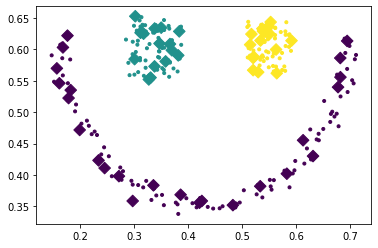

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

## **Con ruido**


**happy**

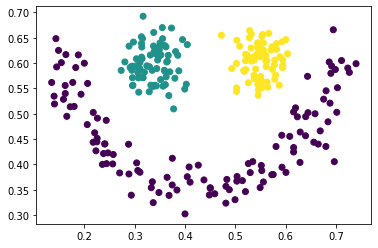

In [0]:
# Set a target SNR
target_snr_db =30
# Calculate signal power and convert to dB 
avg_happy = np.mean(happy)
avg_db = 10 * np.log10(avg_happy)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),happy.shape)
noisy_happy=happy+noise_volts
plt.scatter(noisy_happy[:,0],noisy_happy[:,1],c=labels_happy)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_happy, labels_happy, test_size=0.2, stratify=labels_happy)

**FP**

/content/PRI/main_functions.py:309: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:309: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:0.9715518951416016sg
Ari: 0.6887346502936464 y accuracy: 0.8888888888888888


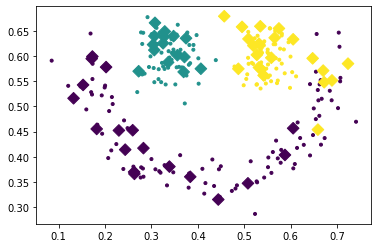

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=3,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.9296224117279053sg
Ari: 1.0 y accuracy: 1.0


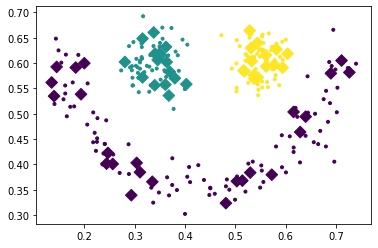

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=15, sigma_initial=40,reduction_='SC',n_clusters=3,gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.06790423393249512sg
Ari: 0.6485702445089101 y accuracy: 0.8703703703703703


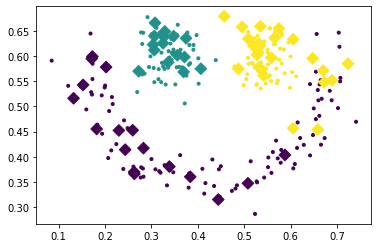

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=1000, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**moons**

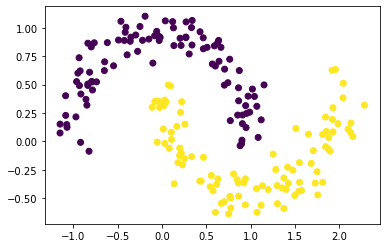

In [4]:

moons,labels_moons = datasets.make_moons(n_samples=200)
# Set a target SNR
target_snr_db =15
# Calculate signal power and convert to dB 
avg_moons = np.mean(moons)
avg_db = 10 * np.log10(avg_moons)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),moons.shape)
noisy_moons=moons+noise_volts
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=labels_moons)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_moons, labels_moons, test_size=0.2, stratify=labels_moons)

**FP**

el tiempo requerido fue:0.8672313690185547sg
Ari: 0.8999407933688574 y accuracy: 0.975


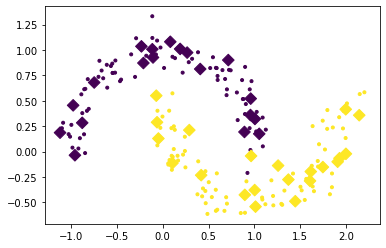

In [0]:
t = time.time()
p = PRI(lambda_=2, n_clusters=2, nn=3, sigma_initial=15,reduction_='SC')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

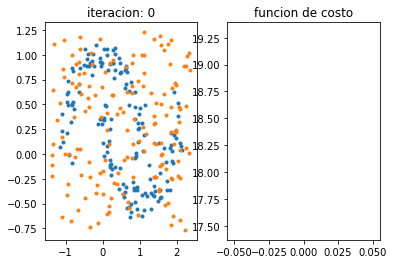

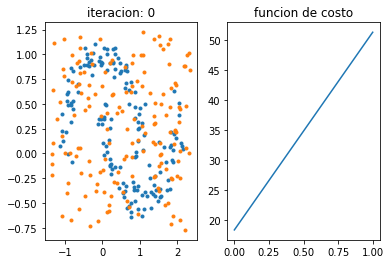

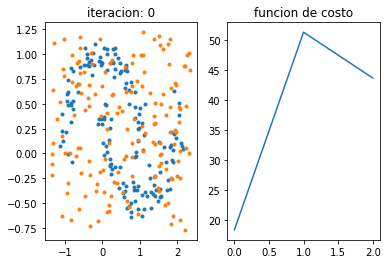

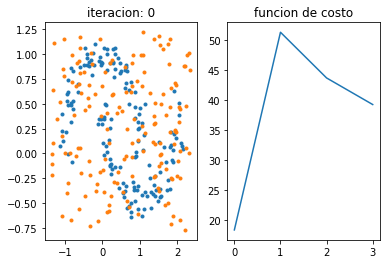

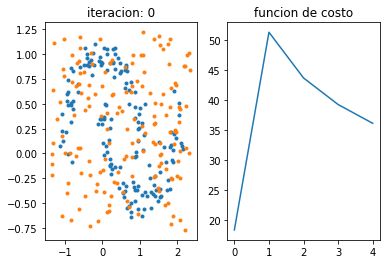

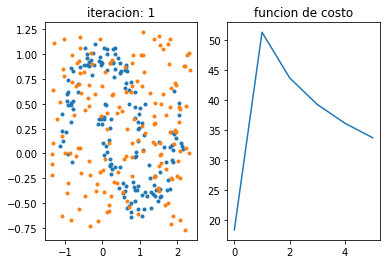

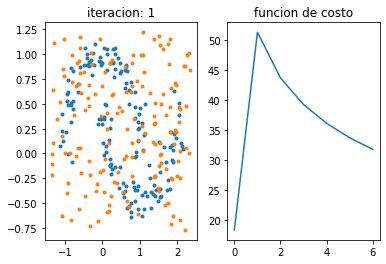

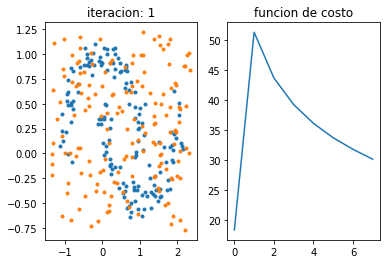

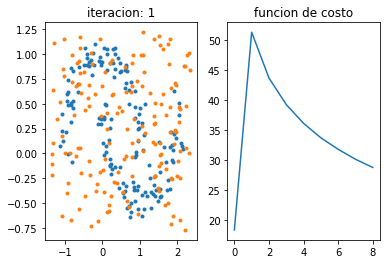

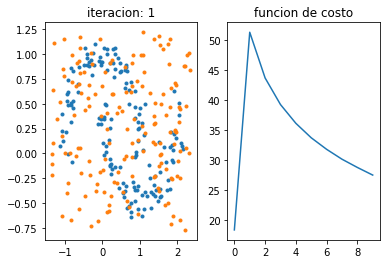

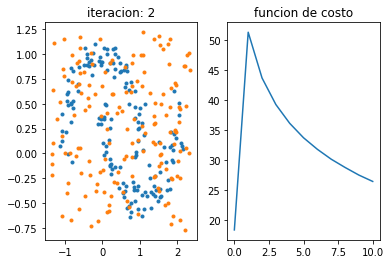

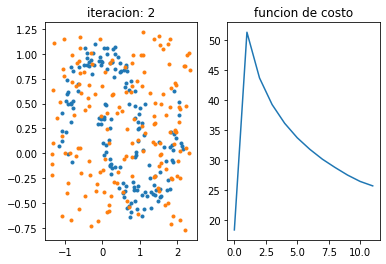

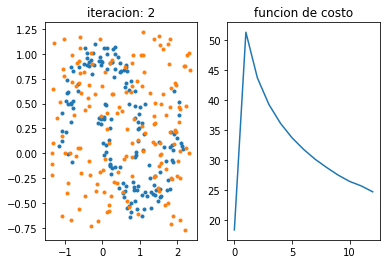

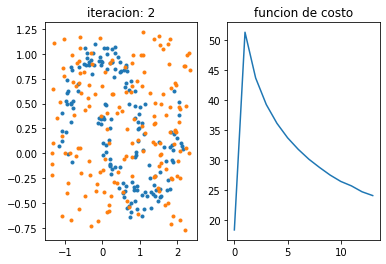

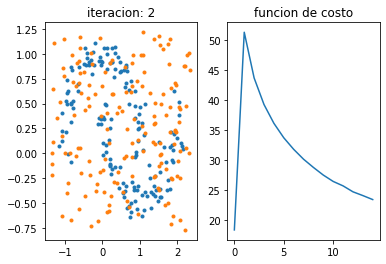

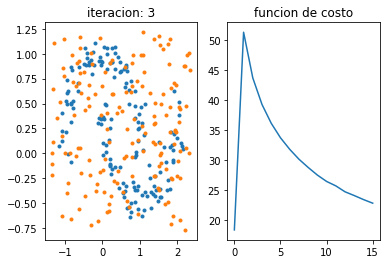

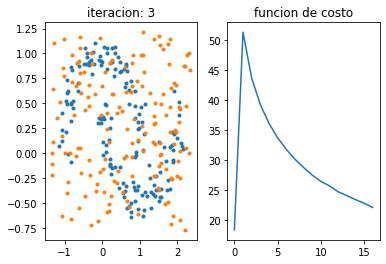

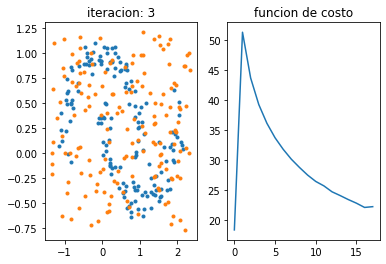

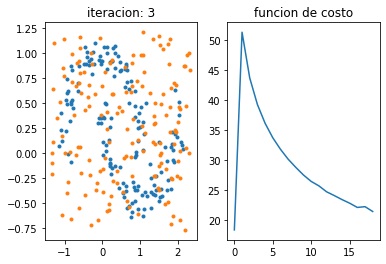

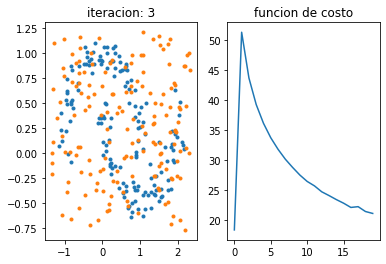

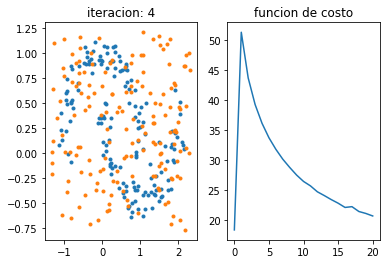

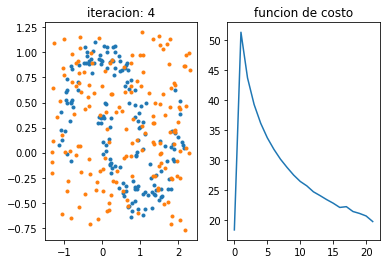

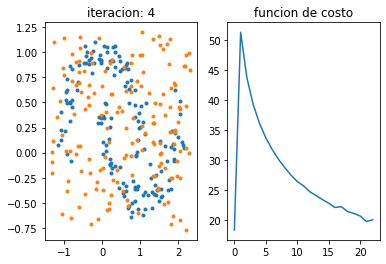

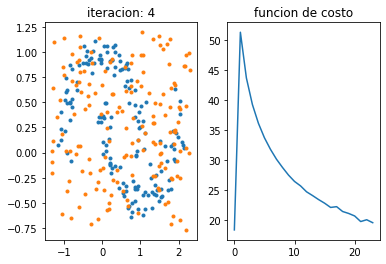

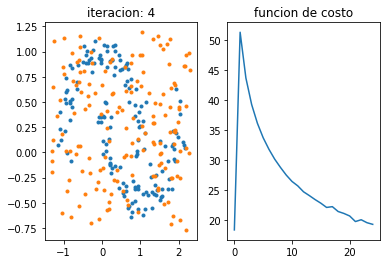

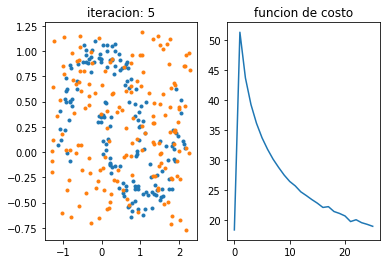

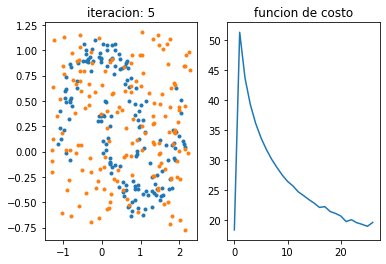

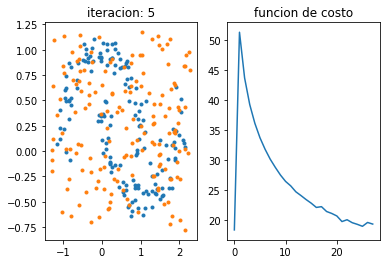

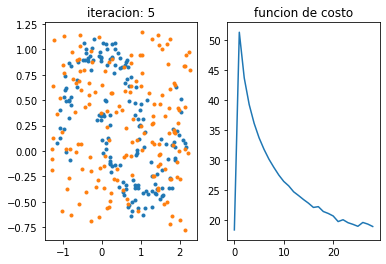

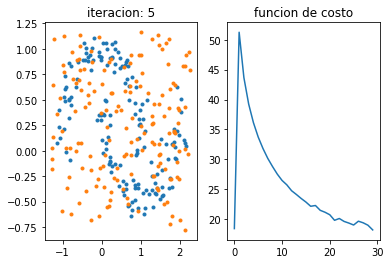

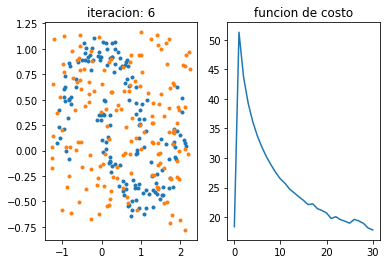

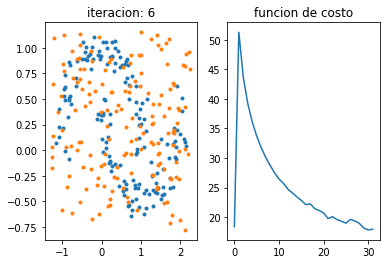

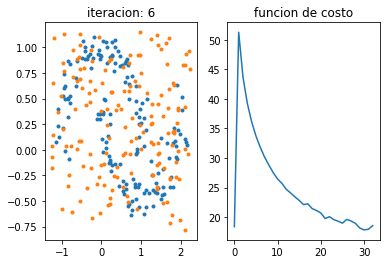

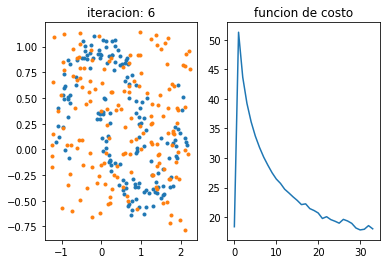

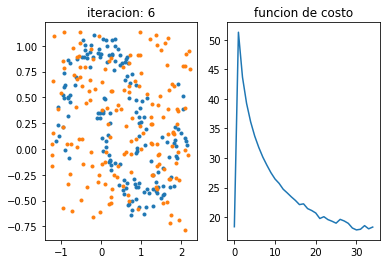

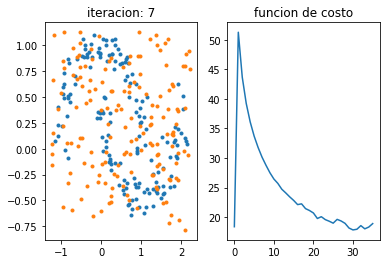

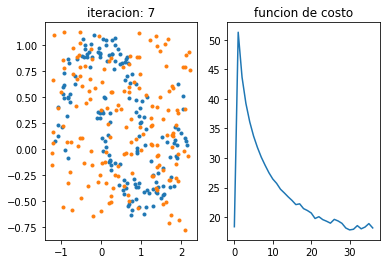

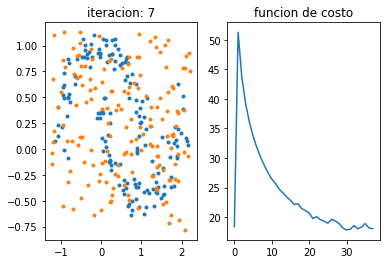

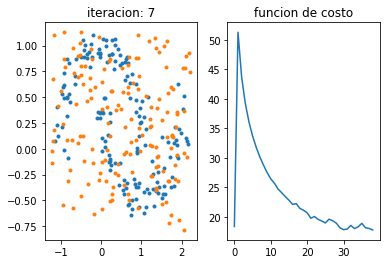

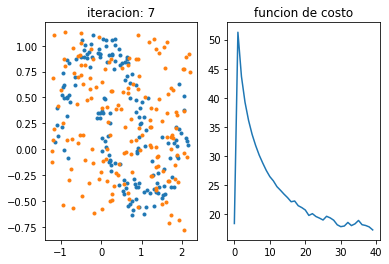

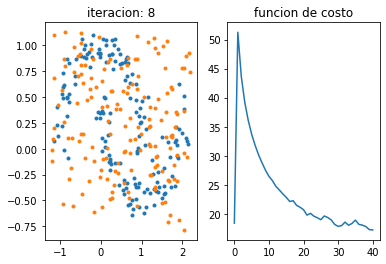

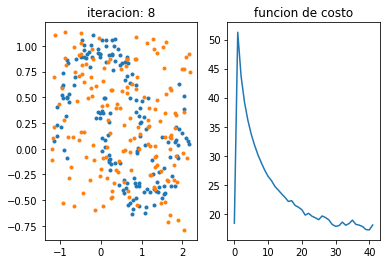

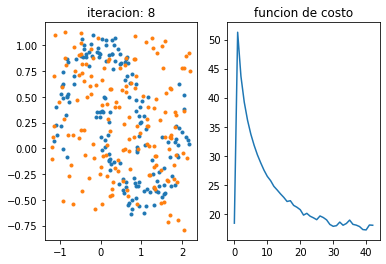

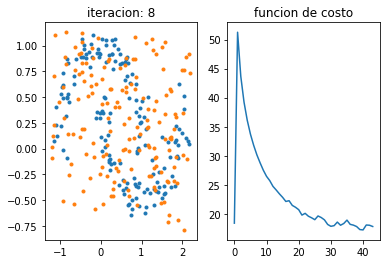

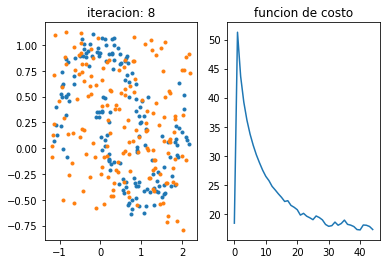

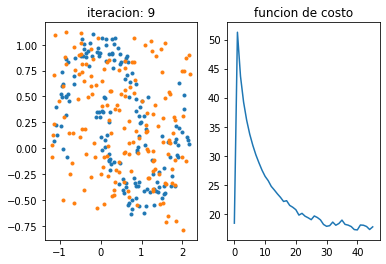

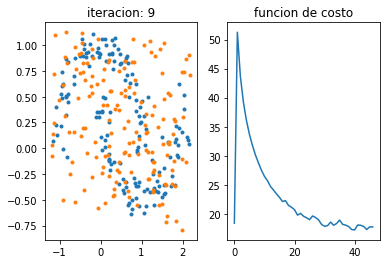

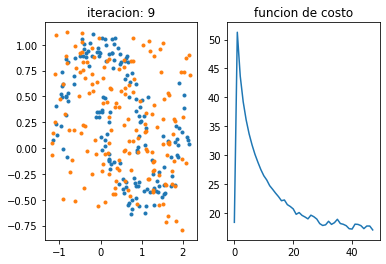

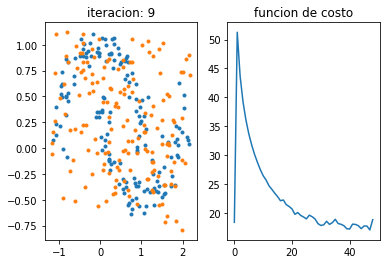

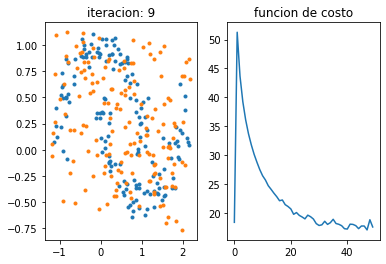

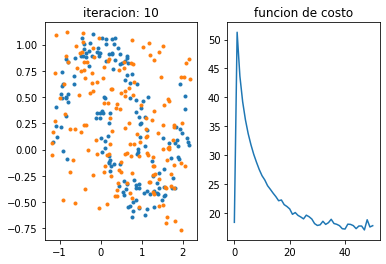

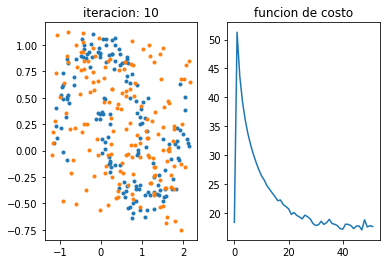

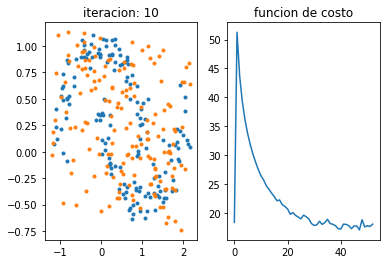

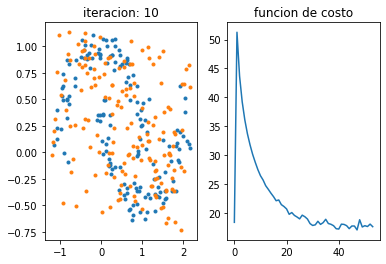

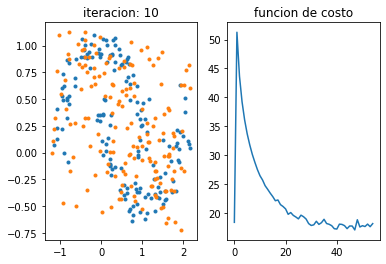

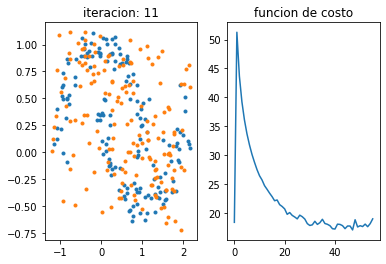

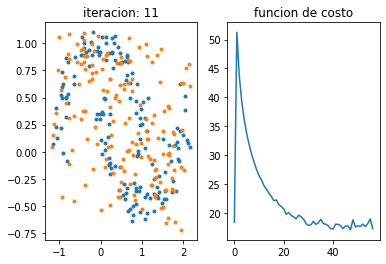

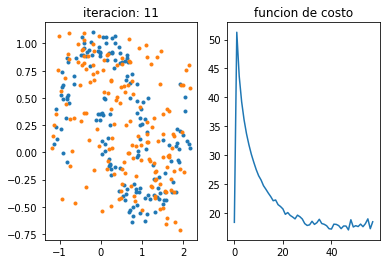

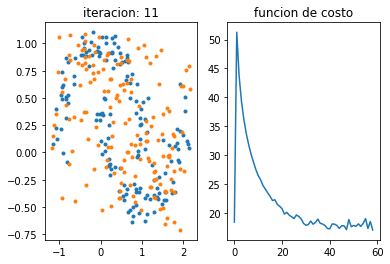

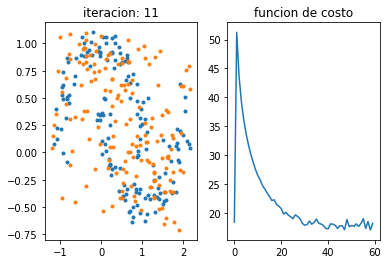

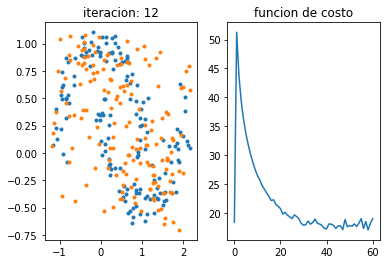

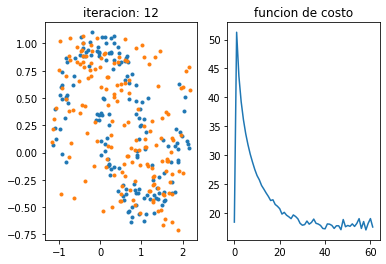

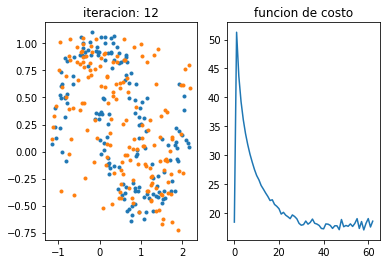

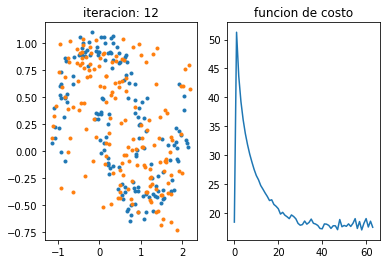

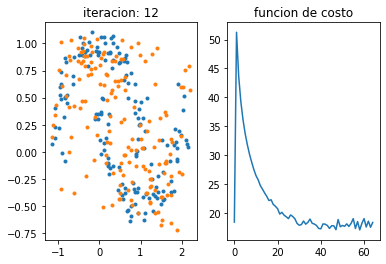

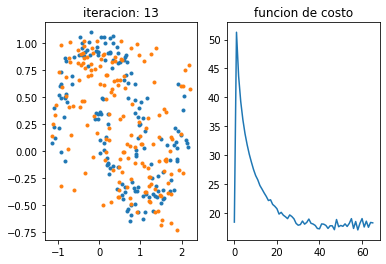

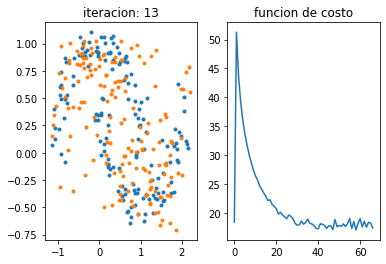

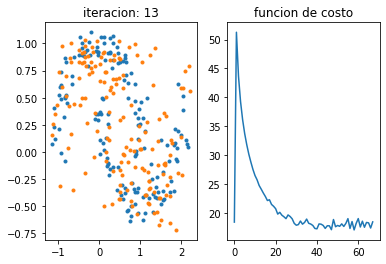

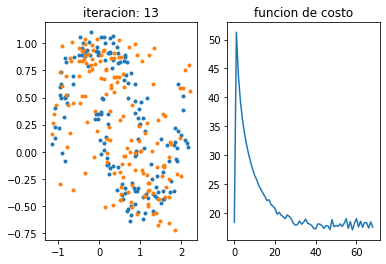

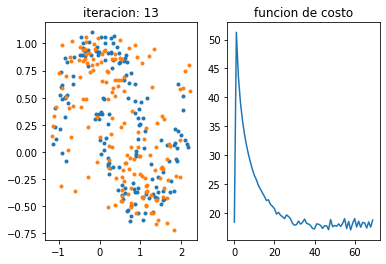

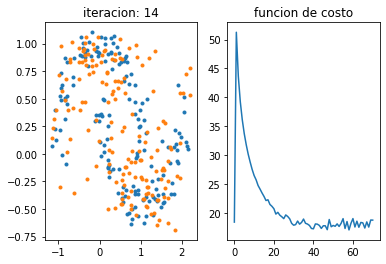

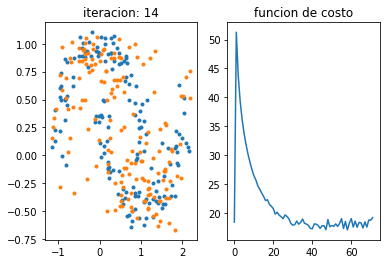

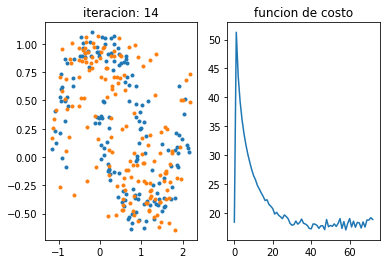

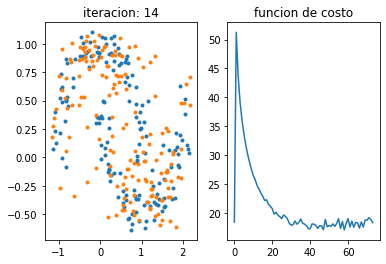

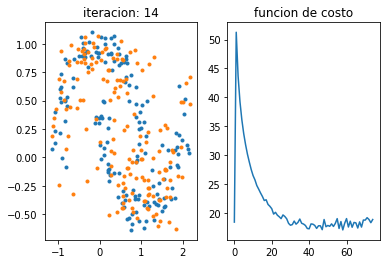

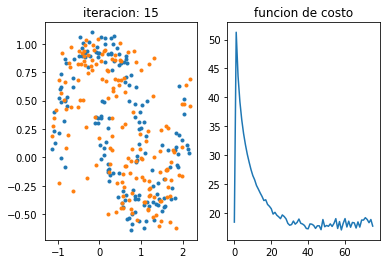

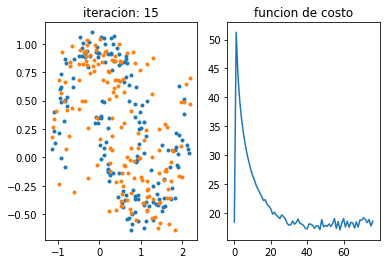

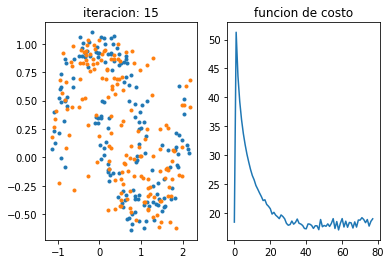

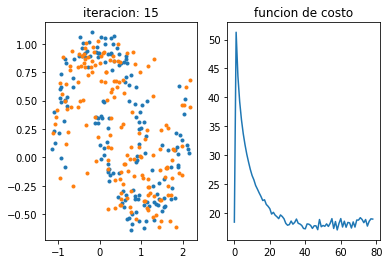

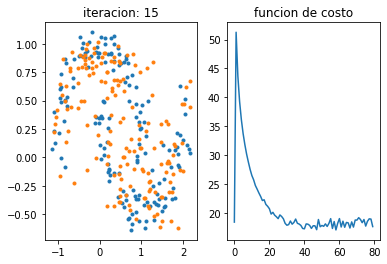

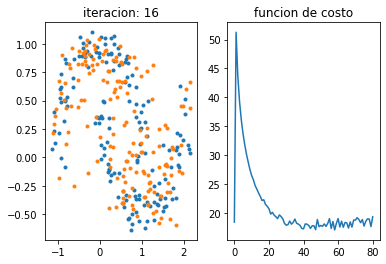

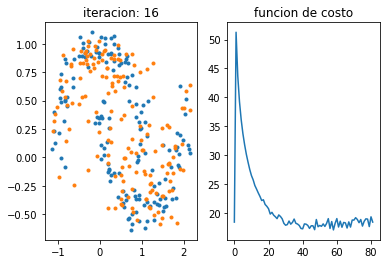

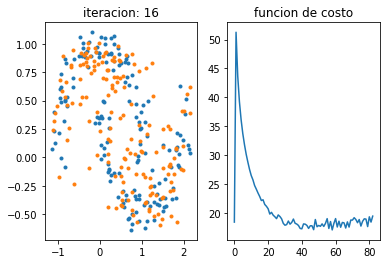

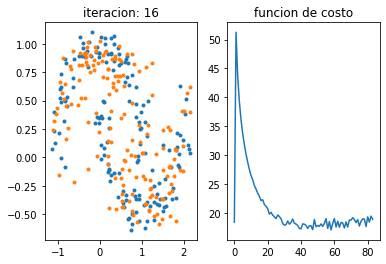

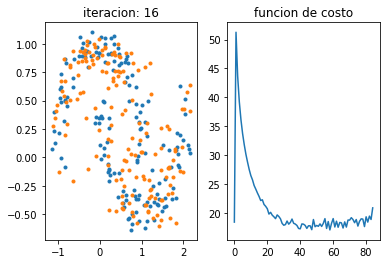

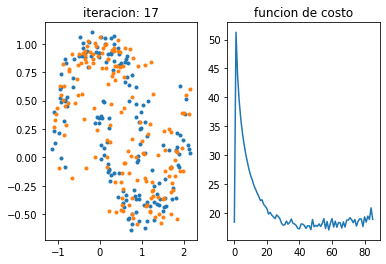

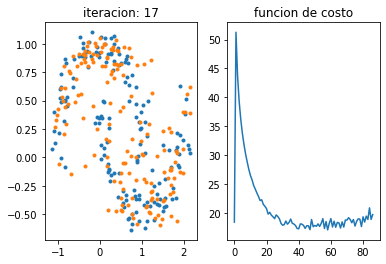

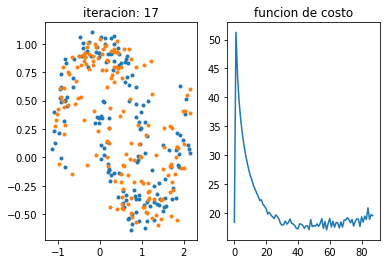

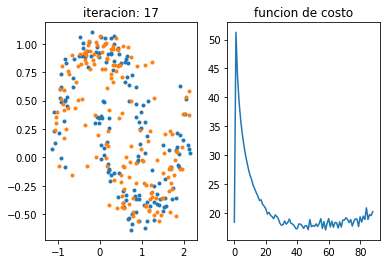

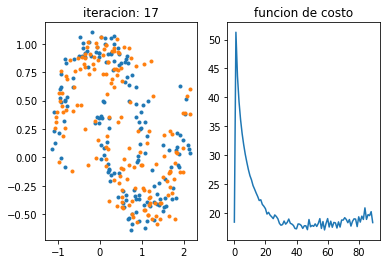

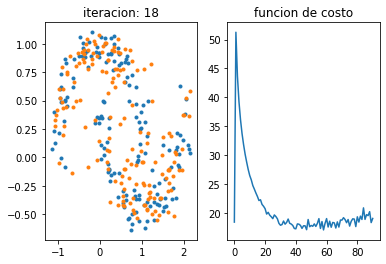

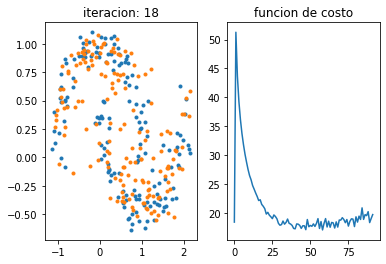

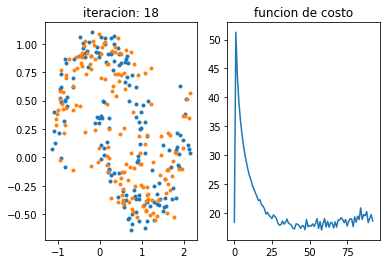

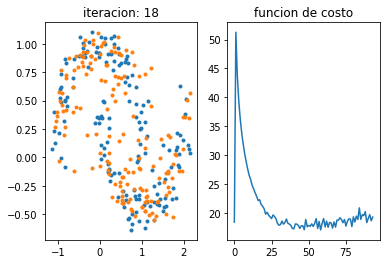

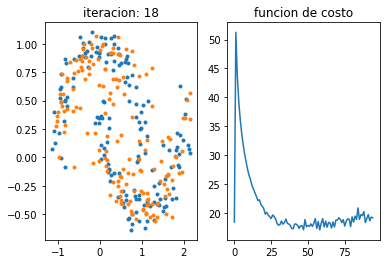

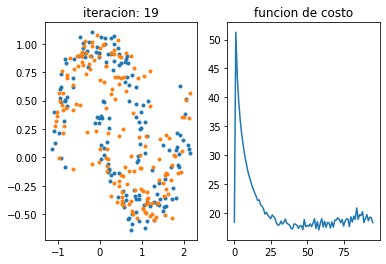

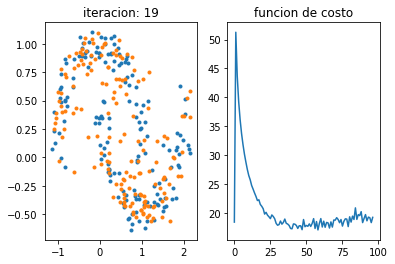

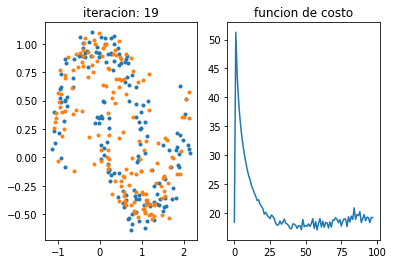

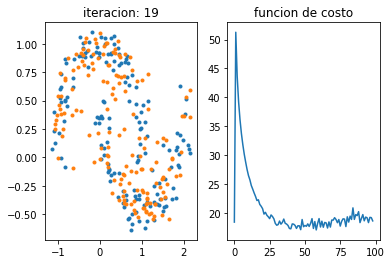

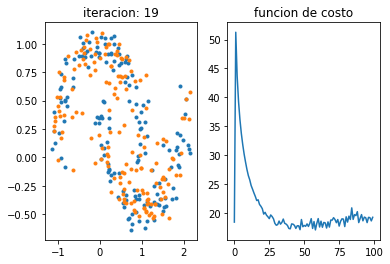

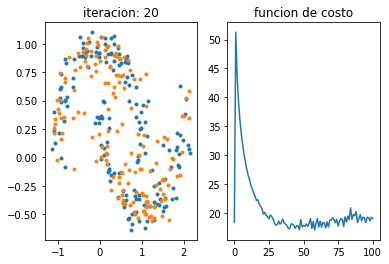

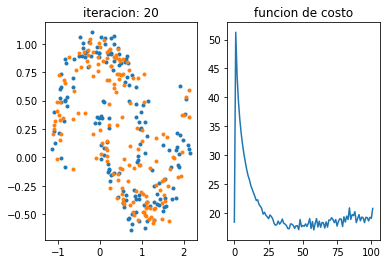

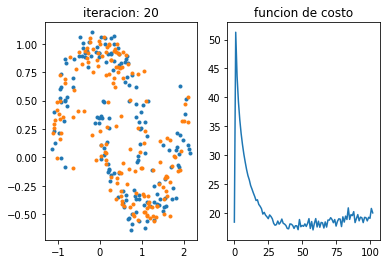

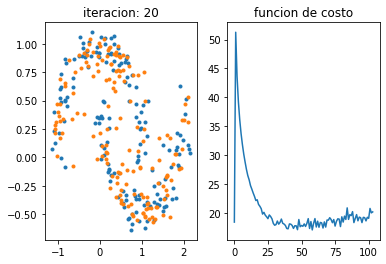

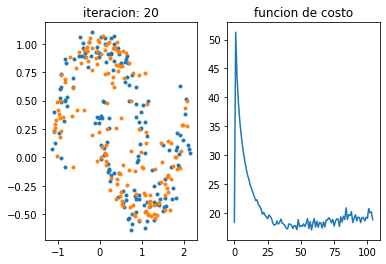

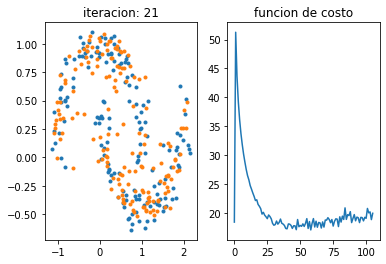

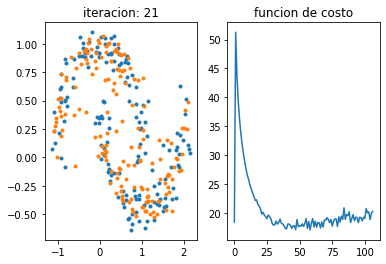

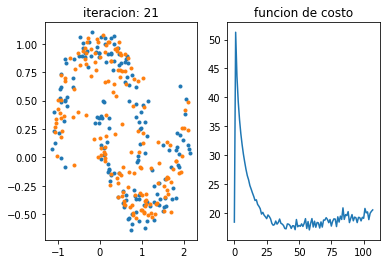

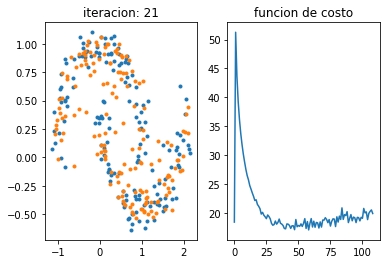

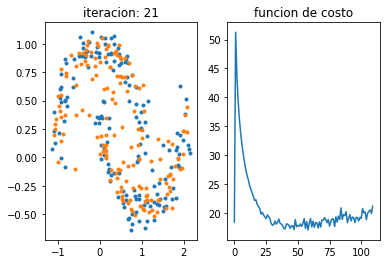

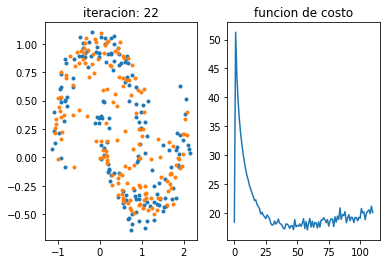

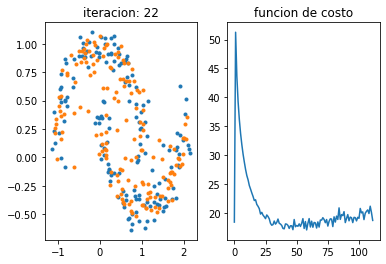

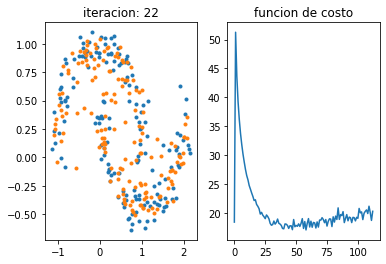

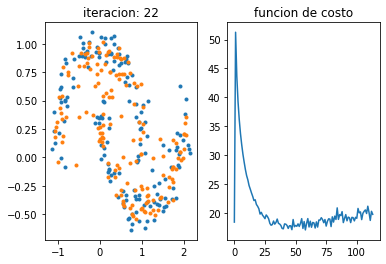

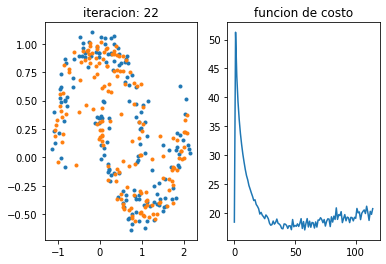

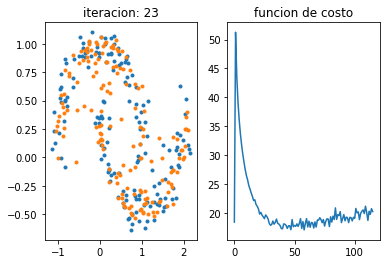

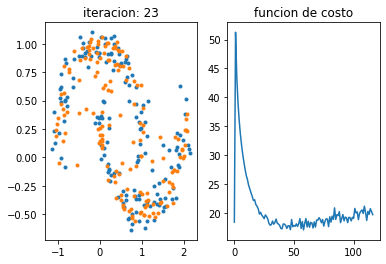

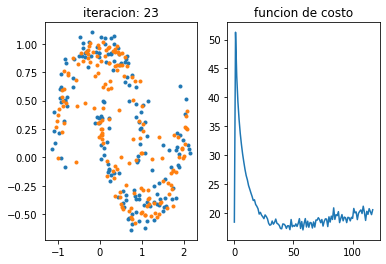

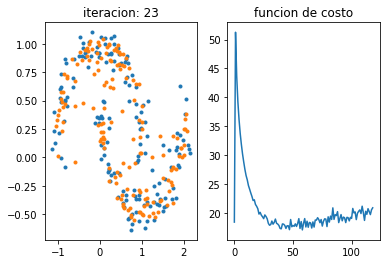

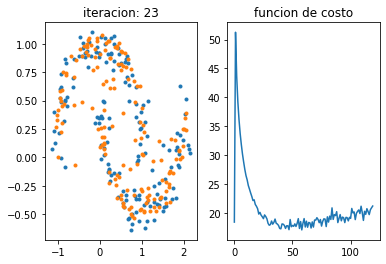

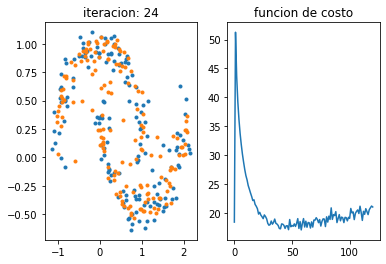

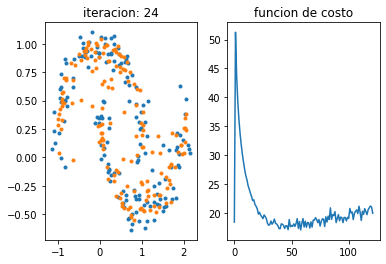

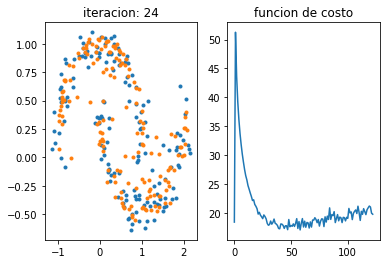

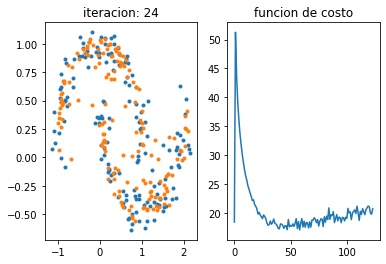

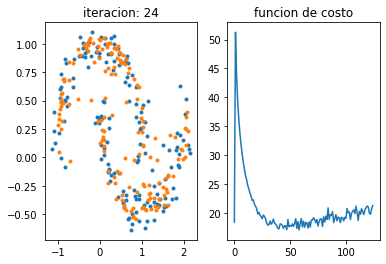

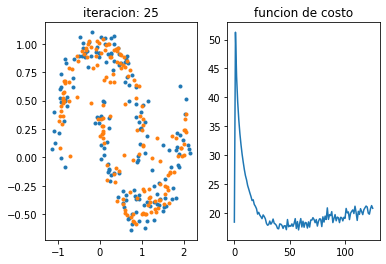

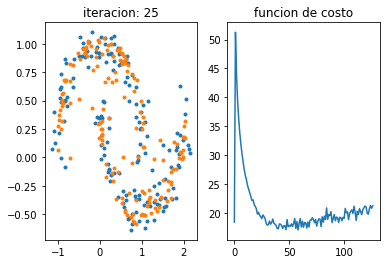

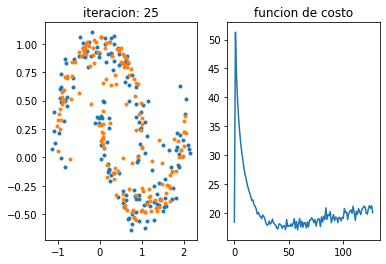

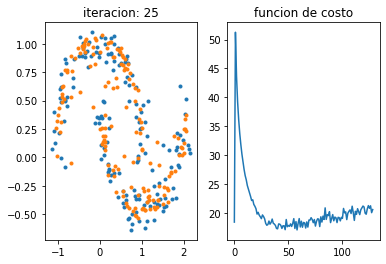

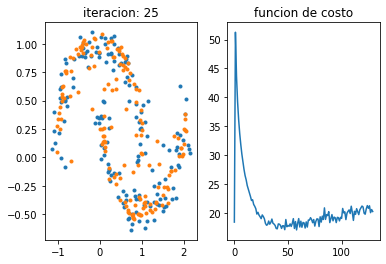

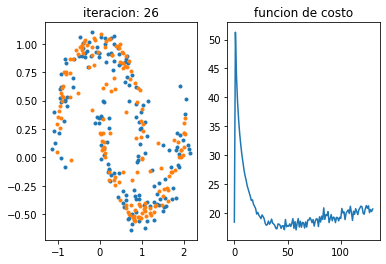

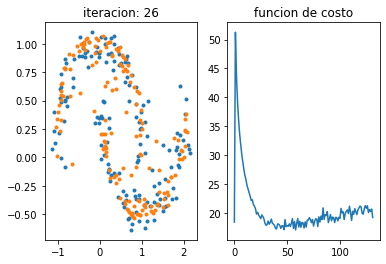

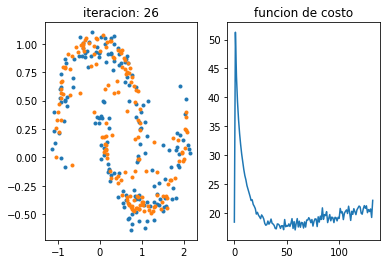

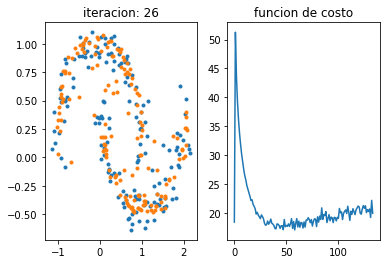

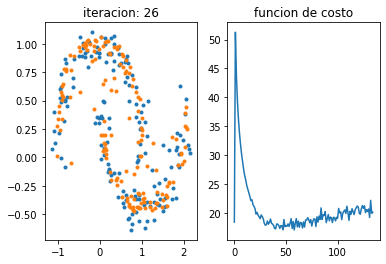

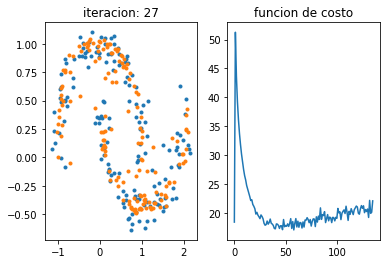

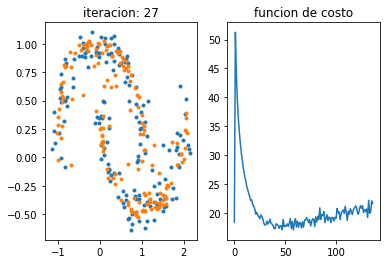

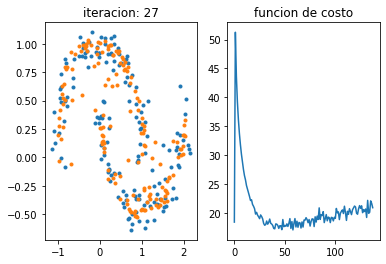

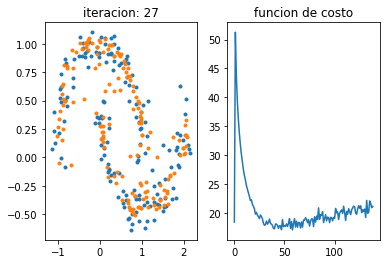

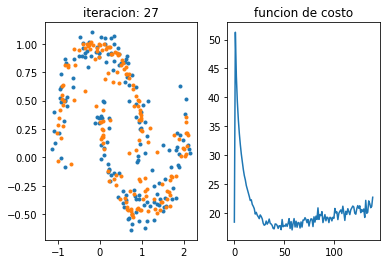

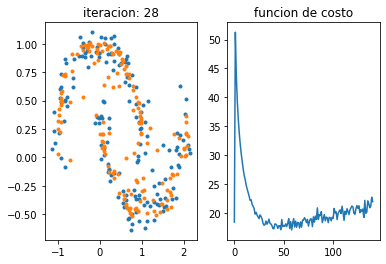

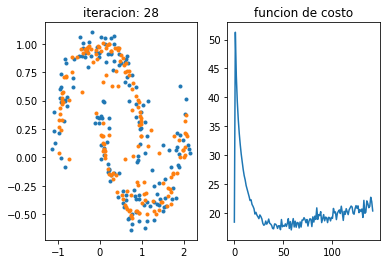

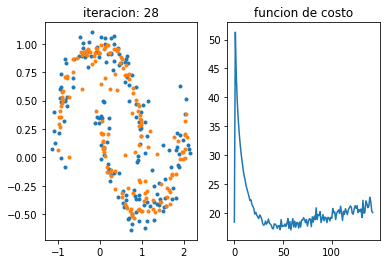

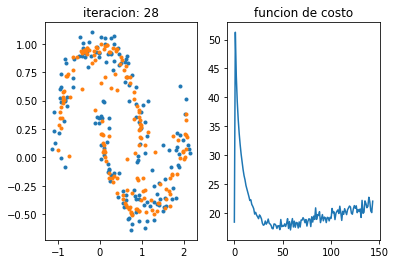

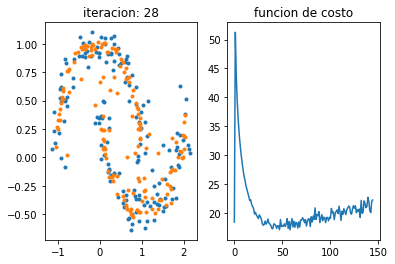

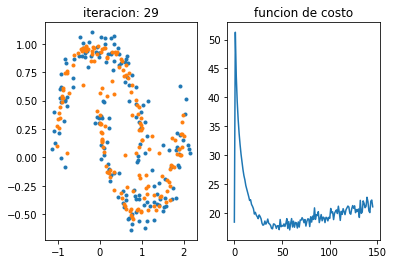

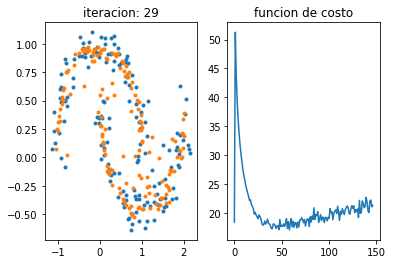

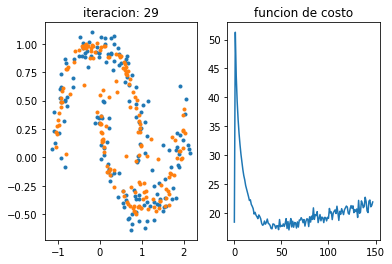

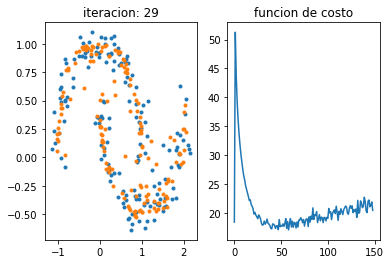

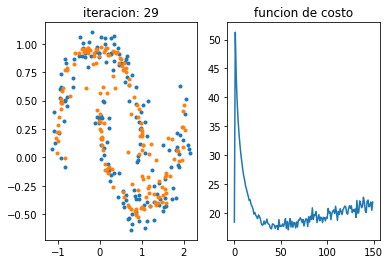

el tiempo requerido fue:52.183340311050415sg
Ari: 0.09946714031971582 y accuracy: 0.675


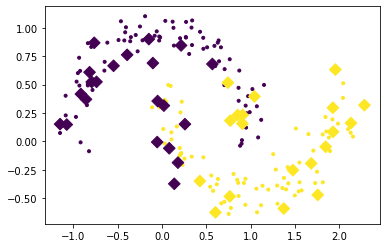

In [18]:
t = time.time()
p = MiniBatchPRI(lambda_=10, sigma_initial=30,learning_rate=0.01,reduction_='SC',n_clusters=2,gamma_=1,show_process=True)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.13807153701782227sg
Ari: 1.0 y accuracy: 1.0


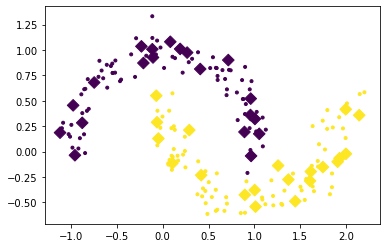

In [0]:
t = time.time()
p = SC(n_clusters_=2, gamma_=100, n_neighbors_=1, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**Happy**

In [0]:
#{'rep__lambda_':[2,3],'rep__sigma_initial':[5,15,25,35],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000]},
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[5,15,30],'rep__sigma_initial':[40],'rep__learning_rate':[0.001,0.003],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
n=[5,15,30]

for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_happy = np.mean(happy)
  avg_db = 10 * np.log10(avg_happy)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),happy.shape)
  noisy_happy=happy+noise_

  for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db','SGD'+str(k)+'db']
    name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    Nc = len(np.unique(labels_happy))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_happy,labels_happy,test_size=0.2, stratify=labels_happy)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 42.592592592592595
ari: -1.0775862068965518
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   12.9s finished


it 2/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   11.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 42.592592592592595
ari: -1.0775862068965518
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.3s finished


it 6/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    9.6s finished


it 8/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.3s finished


it 9/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.2s finished


it 10/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 33.33333333333333
ari: -0.808038408059395
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.0min finished


it 1/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 44.44444444444444
ari: 0.0
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.9min finished


it 2/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 44.44444444444444
ari: 0.0
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.7min finished


it 3/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 44.44444444444444
ari: 0.0
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.9min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 44.44444444444444
ari: 0.0
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.7min finished


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 5, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 42.592592592592595
ari: -1.0775862068965518
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.8min finished


it 6/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 44.44444444444444
ari: 0.0
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.1min finished


it 7/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 44.44444444444444
ari: 0.0
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.8min finished


it 8/10
{'rep__gamma_': 100, 'rep__lambda_': 5, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 44.44444444444444
ari: 0.0
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.7min finished


it 9/10
{'rep__gamma_': 100, 'rep__lambda_': 30, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 44.44444444444444
ari: 0.0
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.0min finished


it 10/10
{'rep__gamma_': 1, 'rep__lambda_': 5, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 44.44444444444444
ari: -0.3011777398183887
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.407407407407405
ari: 26.472408457968026
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 53.70370370370371
ari: 14.943917169974116
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 55.55555555555556
ari: 12.298576486740371
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 61.111111111111114
ari: 24.710128234661756
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 55.55555555555556
ari: 14.280277804205117
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 55.55555555555556
ari: 16.81614349775785
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 59.25925925925925
ari: 18.079625292740047
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 59.25925925925925
ari: 23.624868821828056
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.407407407407405
ari: 19.638989169675092
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 46.2962962962963
ari: 5.698813821557505
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 53.70370370370371
ari: 11.277308090661657
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 53.70370370370371
ari: 10.501663996055715
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 53.70370370370371
ari: 9.997735792095398
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 55.55555555555556
ari: 16.81614349775785
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 59.25925925925925
ari: 38.22972096041532
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 59.25925925925925
ari: 21.69476035743298
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 57.407407407407405
ari: 17.344294967613354
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 62.96296296296296
ari: 26.880647060329167
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 53.70370370370371
ari: 14.943917169974116
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 59.25925925925925
ari: 23.624868821828056
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   52.0s finished


it 1/10
{'rep__gamma_': 1, 'rep__lambda_': 5, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 61.111111111111114
ari: 14.36995105843505
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   52.0s finished


it 2/10
{'rep__gamma_': 1, 'rep__lambda_': 30, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 50.0
ari: 11.376437455996246
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   54.4s finished


it 3/10
{'rep__gamma_': 1, 'rep__lambda_': 30, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 53.70370370370371
ari: 14.208883175486003
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   52.7s finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 70.37037037037037
ari: 28.55700712589073
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   52.2s finished


it 5/10
{'rep__gamma_': 1, 'rep__lambda_': 30, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 68.51851851851852
ari: 26.76157007564477
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   52.0s finished


it 6/10
{'rep__gamma_': 1, 'rep__lambda_': 5, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 74.07407407407408
ari: 37.80883306798749
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   52.3s finished


it 7/10
{'rep__gamma_': 1, 'rep__lambda_': 5, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 62.96296296296296
ari: 18.66367607130209
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   54.2s finished


it 8/10
{'rep__gamma_': 1, 'rep__lambda_': 5, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 66.66666666666666
ari: 21.987264919295132
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   52.4s finished


it 9/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 59.25925925925925
ari: 20.73233625580196
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   53.7s finished


it 10/10
{'rep__gamma_': 1, 'rep__lambda_': 5, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 64.81481481481481
ari: 27.882770250625104
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 88.88888888888889
ari: 68.87346502936464
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 88.88888888888889
ari: 68.87346502936464
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 87.03703703703704
ari: 64.857024450891
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 94.44444444444444
ari: 83.02189001601708
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 88.88888888888889
ari: 68.87346502936464
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 88.88888888888889
ari: 68.87346502936464
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 85.18518518518519
ari: 61.20883012631331
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 87.03703703703704
ari: 64.857024450891
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 90.74074074074075
ari: 73.24821852731591
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 83.33333333333334
ari: 54.36460807600949
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 75.92592592592592
ari: 41.09388710149167
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 74.07407407407408
ari: 39.22194803309624
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 70.37037037037037
ari: 34.459013571285105
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 74.07407407407408
ari: 40.139009556907034
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 79.62962962962963
ari: 47.49690429860251
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 79.62962962962963
ari: 47.49690429860251
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 74.07407407407408
ari: 39.22194803309624
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 75.92592592592592
ari: 42.19643065438003
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 79.62962962962963
ari: 47.49690429860251
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   58.6s finished


it 1/10
{'rep__gamma_': 500, 'rep__lambda_': 5, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.0min finished


it 2/10
{'rep__gamma_': 500, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 85.18518518518519
ari: 61.20883012631331
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.0min finished


it 3/10
{'rep__gamma_': 500, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   58.6s finished


it 4/10
{'rep__gamma_': 500, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 75.92592592592592
ari: 41.462131837307155
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.0min finished


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 88.88888888888889
ari: 68.87346502936464
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished


it 6/10
{'rep__gamma_': 500, 'rep__lambda_': 5, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 88.88888888888889
ari: 68.87346502936464
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.3min finished


it 7/10
{'rep__gamma_': 500, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 88.88888888888889
ari: 68.87346502936464
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.0min finished


it 8/10
{'rep__gamma_': 500, 'rep__lambda_': 5, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 94.44444444444444
ari: 83.02189001601708
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   58.0s finished


it 9/10
{'rep__gamma_': 500, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 87.03703703703704
ari: 64.857024450891
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.0min finished


it 10/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 74.07407407407408
ari: 38.485033598045206


**Moons**


In [0]:
#{'rep__lambda_':[2,3],'rep__sigma_initial':[5,15,25,35],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000]},
n_clusters=2
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[2,15,30],'rep__sigma_initial':[30],'rep__learning_rate':[0.01,0.03],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
n_clusters=2
steps =[[('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__lambda_':[2,7,15],'rep__sigma_initial':[30],'rep__learning_rate':[0.01,0.03],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,100,500],'rep__optimization':['Nadam',None]}]

In [20]:
n=[5,15,30]
moons,labels_moons = datasets.make_moons(n_samples=200)
for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_moons = np.mean(moons)
  avg_db = 10 * np.log10(avg_moons)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),moons.shape)
  noisy_moons=moons+noise_
  

  for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['SGD'+str(k)+'db']
    name='/content/PRI/moons' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    Nc = len(np.unique(labels_moons))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_moons,labels_moons,test_size=0.2, stratify=labels_moons)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.4s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  4.3min finished


it 1/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 75.0
ari: 23.107255520504726
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  4.2min finished


it 2/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 75.0
ari: 23.34905660377358
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.2s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  4.0min finished


it 3/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 90.0
ari: 63.05263157894737
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  4.1min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 77.5
ari: 28.53201970443349
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  4.3min finished


it 5/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 87.5
ari: 55.172413793103445
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.9min finished


it 6/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 52.5
ari: -0.46484601975594697
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  4.1min finished


it 7/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 77.5
ari: 28.53201970443349
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  4.1min finished


it 8/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 70.0
ari: 14.15094339622641
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  4.1min finished


it 9/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 77.5
ari: 28.644501278772378
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  4.2min finished


it 10/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 80.0
ari: 34.333070244672456
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.4min finished


it 1/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.6min finished


it 2/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 87.5
ari: 55.172413793103445
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.2s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.4min finished


it 3/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.2s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.3min finished


it 4/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.2s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.4min finished


it 5/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 50.0
ari: 0.0
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.2min finished


it 6/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.6min finished


it 7/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 72.5
ari: 18.79772860779323
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.4min finished


it 8/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.3min finished


it 9/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.2s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.5min finished


it 10/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.2s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.6min finished


it 1/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.5min finished


it 2/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.6min finished


it 3/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.4min finished


it 4/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.8min finished


it 5/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.6min finished


it 6/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.5min finished


it 7/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.4s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.6min finished


it 8/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.3s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.7min finished


it 9/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.8min finished


it 10/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0


In [0]:
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__results'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')

**Mostrar Resultados**
1. **Happy**

In [0]:
Racc=np.zeros((10,9))
Rari=np.zeros((10,9))
meth=['sc_5db','sc_15db','sc_30db','Knn5db','Knn15db','Knn30db','SGD5db','SGD15db','SGD30db']
meth2=['SC5','SC15','SC30','KM5','KM15','KM30','SGD5','SGD15','SGD30']
j=0
for i in meth:
  aux=load('/content/PRI/happy'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  j+=1

**Accuracy**

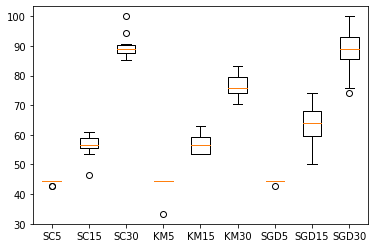

In [0]:
plt.boxplot(Racc,labels=meth2)
plt.show()

**ARI**

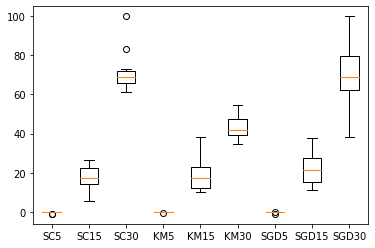

In [0]:
plt.boxplot(Rari,labels=meth2)
plt.show()

2. **Moons**

In [0]:
Racc=np.zeros((10,9))
Rari=np.zeros((10,9))
meth=['sc_5db','sc_15db','sc_30db','Knn5db','Knn15db','Knn30db','SGD5db','SGD15db','SGD30db']
meth2=['SC5','SC15','SC30','KM5','KM15','KM30','SGD5','SGD15','SGD30']
j=0
for i in meth:
  aux=load('/content/PRI/moons'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  j+=1

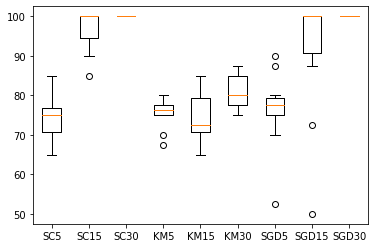

In [23]:
plt.boxplot(Racc,labels=meth2)
plt.show()

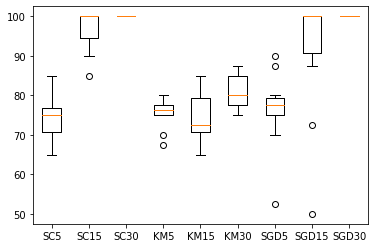

In [24]:
plt.boxplot(Racc,labels=meth2)
plt.show()

### **Parte 2. Real dataset**

In [0]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
wine= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
sonar=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data')
glass=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')
ecoli=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data')
liver=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data')
ionosphere=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data')

**Iris**

**Pre procesamiento de la base de datos**

In [0]:
iris,labels_iris=pre_process(iris)

**Pruebas**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    iris, labels_iris, test_size=0.2, stratify=labels_iris)

**Spectral Clustering**

In [0]:
t = time.time()
p = SC(n_clusters_=3,gamma_=1,nn=5)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
# ARI
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
# Accuracy
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
# Jaccard
Rjacc_SGD=jaccard_score(y_test,labels_pre_SGD,average='weighted')
# Purity
Rpuri_SGD=purity_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
print('Jacc: '+str(Rjacc_SGD)+' y'+' Purity: '+str(Rpuri_SGD))

el tiempo requerido fue:0.047942399978637695sg
Ari: 0.667144906743185 y accuracy: 0.8666666666666667
Jacc: 0.7714285714285715 y Purity: 0.8666666666666667


**PRI**

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=15, sigma_initial=35,reduction_='SC',n_clusters=3,gamma_=10,nn=5,learning_rate=0.05)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
# ARI
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
# Accuracy
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
# Jaccard
Rjacc_SGD=jaccard_score(y_test,labels_pre_SGD,average='weighted')
# Purity
Rpuri_SGD=purity_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
print('Jacc: '+str(Rjacc_SGD)+' y'+' Purity: '+str(Rpuri_SGD))

el tiempo requerido fue:0.3131070137023926sg
Ari: 0.7310420076377523 y accuracy: 0.9
Jacc: 0.8230769230769232 y Purity: 0.9


**Sonar**

**Pre procesamiento de la base de datos**

In [0]:
sonar,labels_sonar=pre_process(sonar)

**Pruebas**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    sonar, labels_sonar, test_size=0.2, stratify=labels_sonar)

**Spectral clustering**

In [0]:
t = time.time()
p = SC(n_clusters_=2,gamma_=1,nn=5)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
# ARI
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
# Accuracy
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
# Jaccard
Rjacc_SGD=jaccard_score(y_test,labels_pre_SGD,average='weighted')
# Purity
Rpuri_SGD=purity_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
print('Jacc: '+str(Rjacc_SGD)+' y'+' Purity: '+str(Rpuri_SGD))

el tiempo requerido fue:0.07969188690185547sg
Ari: 0.0 y accuracy: 0.5238095238095238
Jacc: 0.2743764172335601 y Purity: 0.5238095238095238


**PRI**

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=35, sigma_initial=150,nn=5,reduction_='SC',n_clusters=2,gamma_=1)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
# ARI
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
# Accuracy
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
# Jaccard
Rjacc_SGD=jaccard_score(y_test,labels_pre_SGD)
# Purity
Rpuri_SGD=purity_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
print('Jacc: '+str(Rjacc_SGD)+' y'+' Purity: '+str(Rpuri_SGD))

el tiempo requerido fue:0.6033086776733398sg
Ari: 0.0 y accuracy: 0.5238095238095238
Jacc: 0.0 y Purity: 0.5238095238095238


**Wine**

**Pre procesamiento**

In [0]:
aux=wine['1']
wine=wine.drop(['1'],axis=1)
wine.insert(wine.shape[1],'1',aux)
wine,labels_wine=pre_process(wine)

**Pruebas**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    wine, labels_wine, test_size=0.2, stratify=labels_wine)

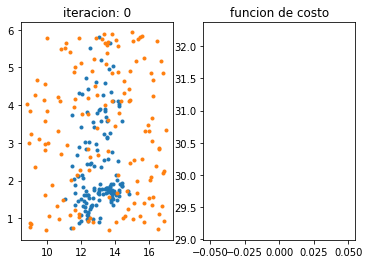

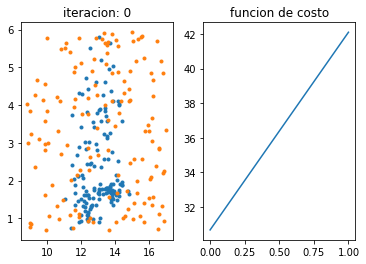

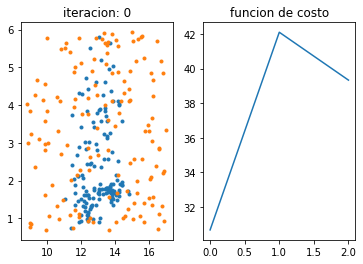

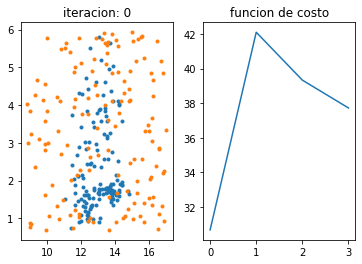

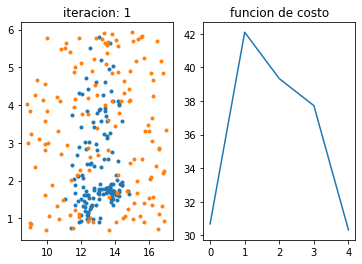

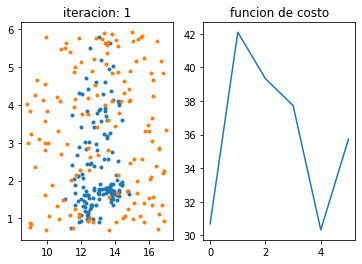

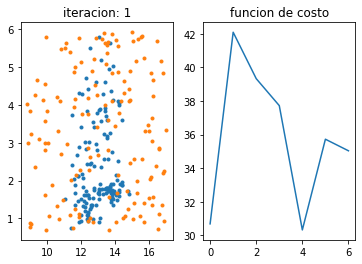

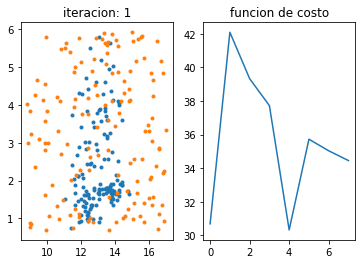

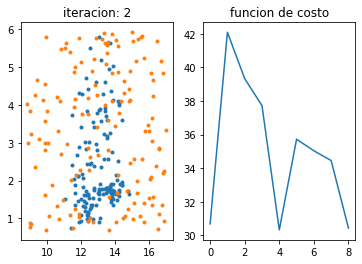

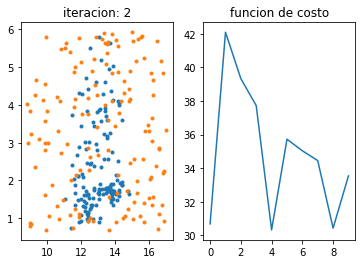

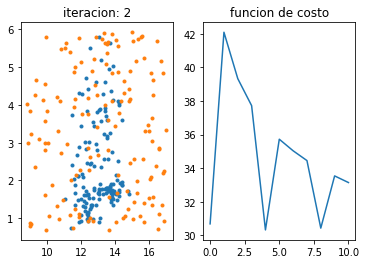

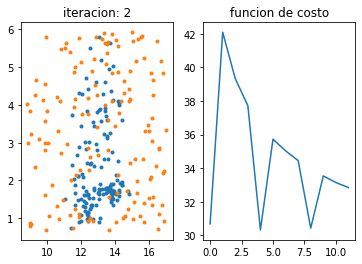

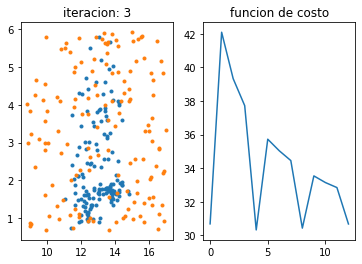

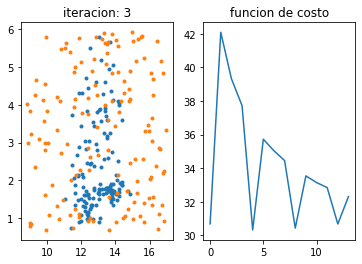

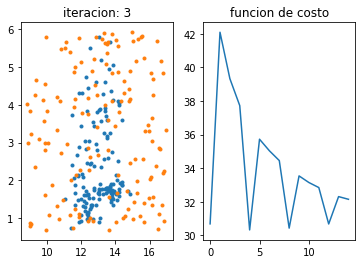

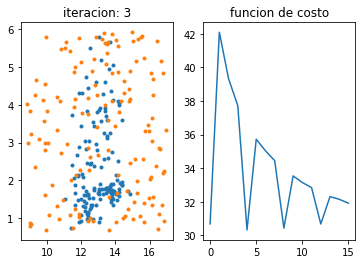

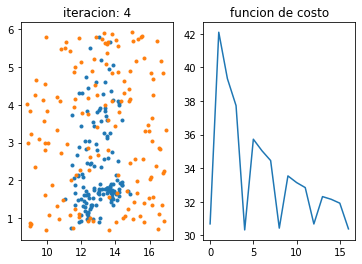

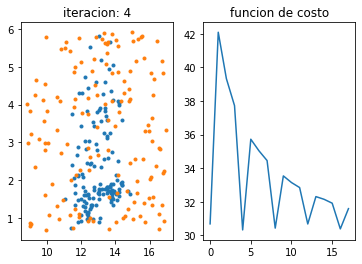

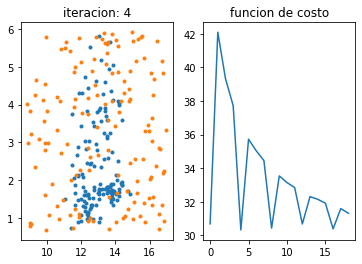

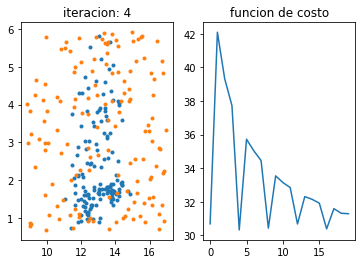

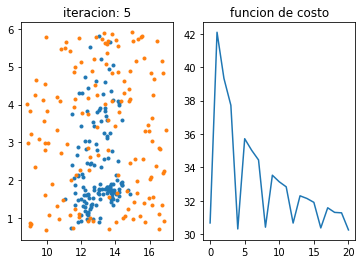

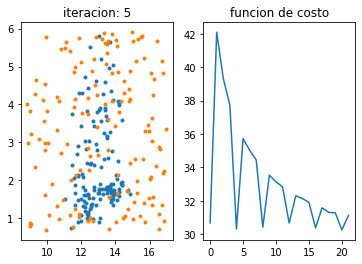

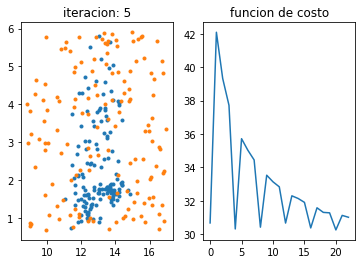

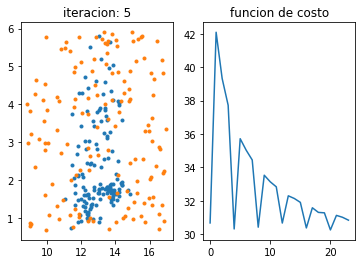

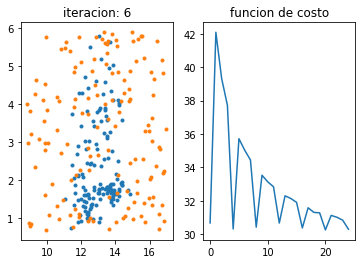

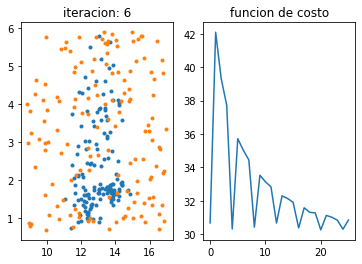

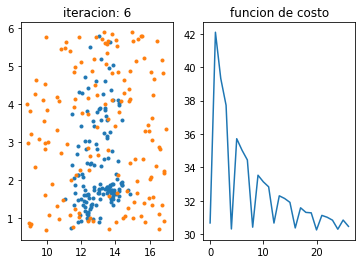

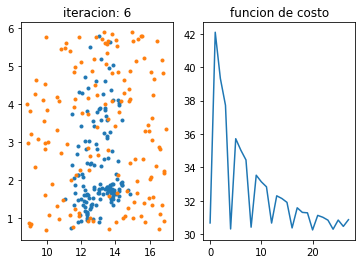

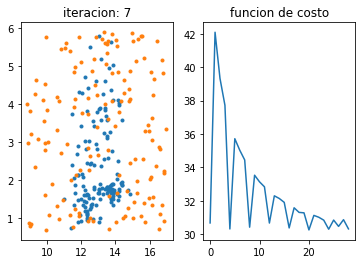

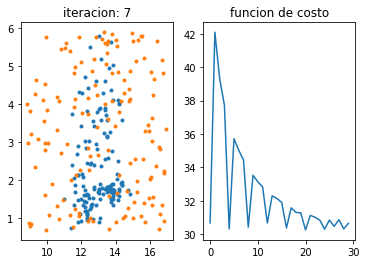

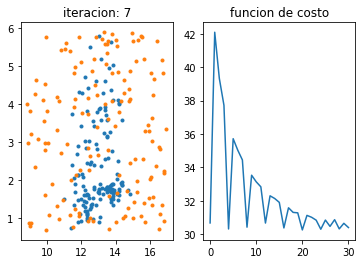

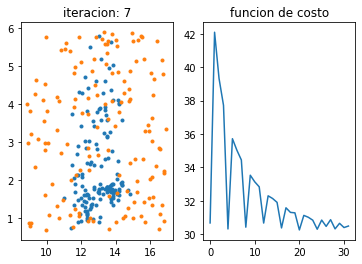

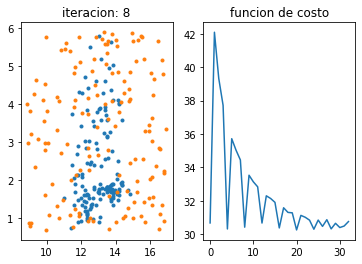

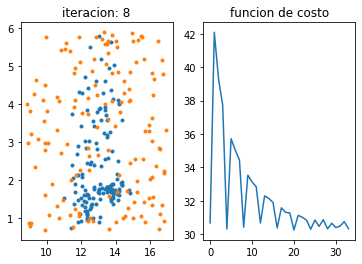

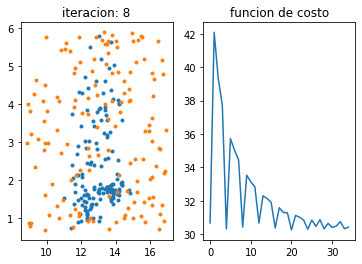

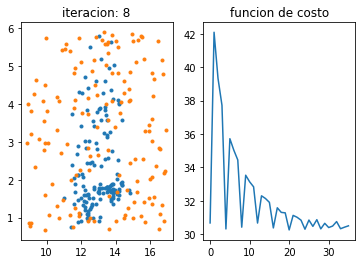

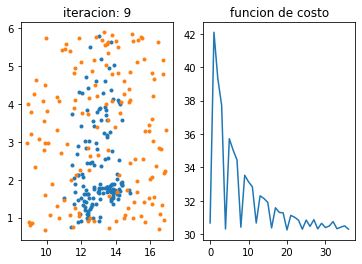

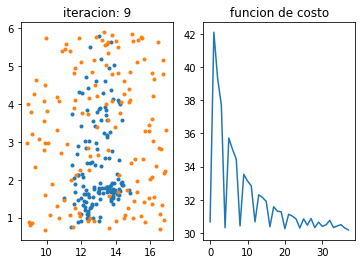

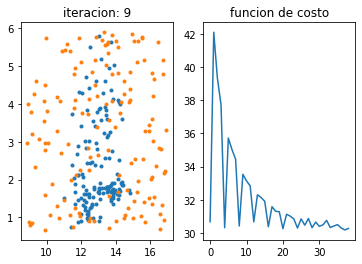

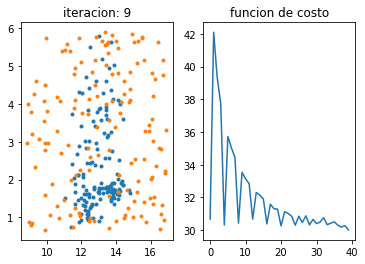

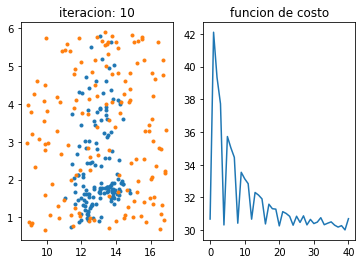

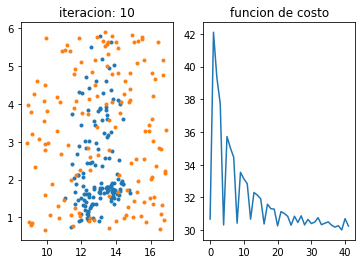

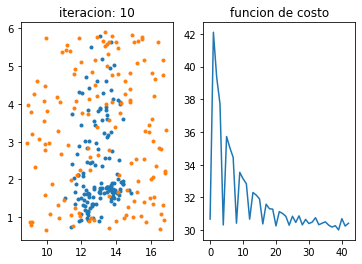

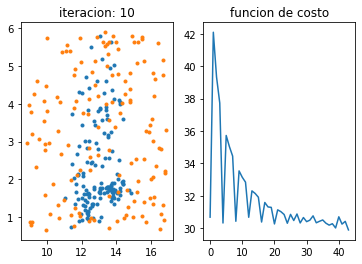

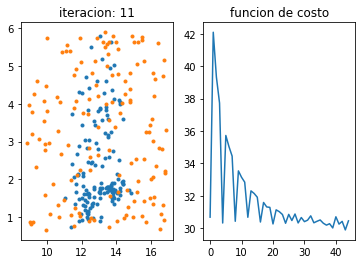

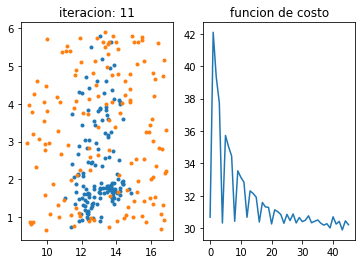

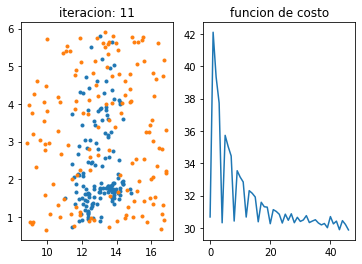

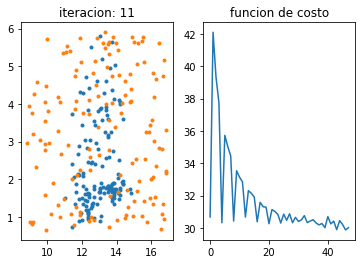

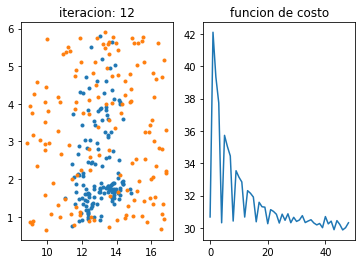

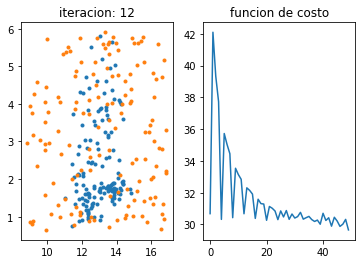

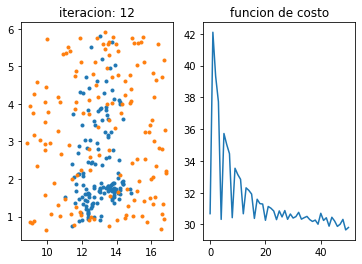

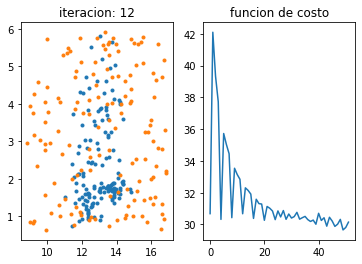

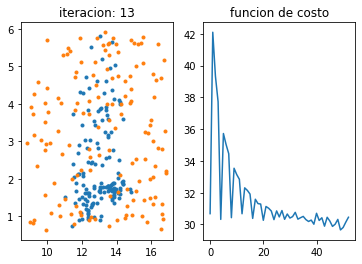

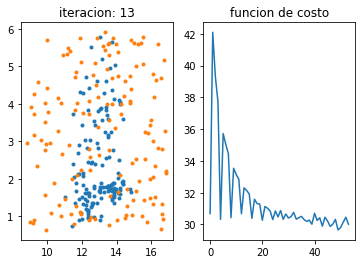

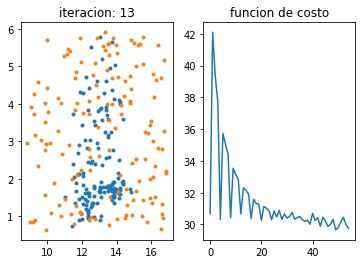

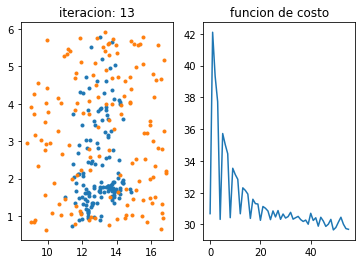

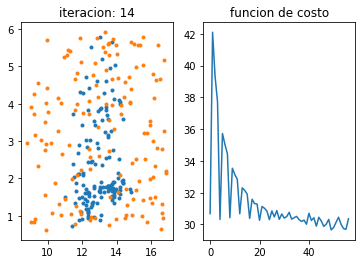

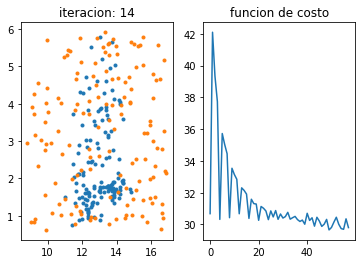

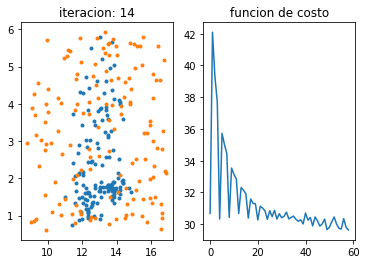

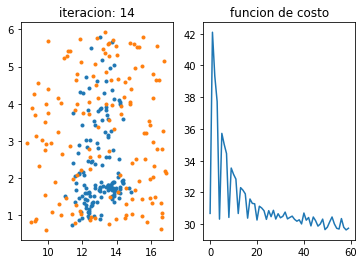

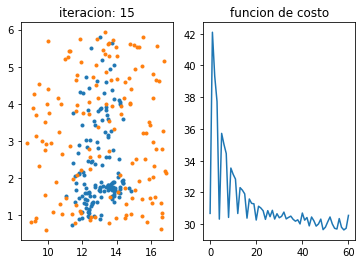

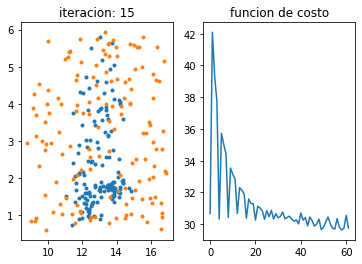

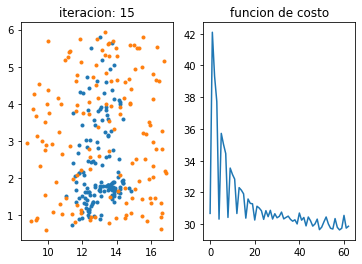

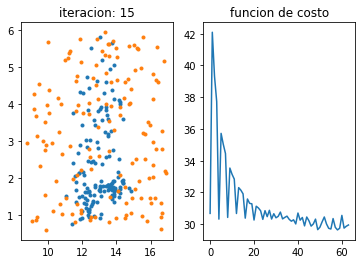

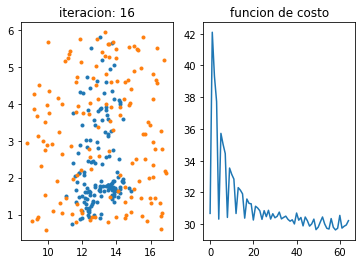

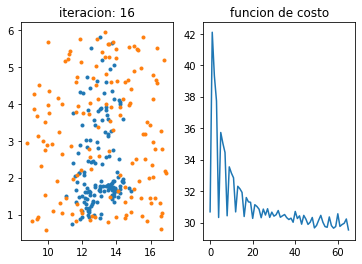

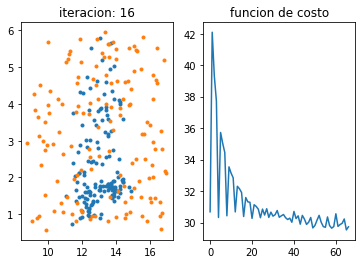

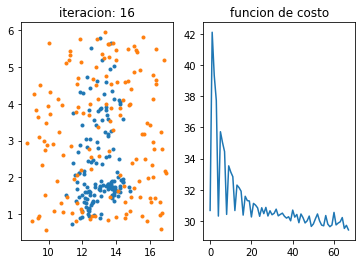

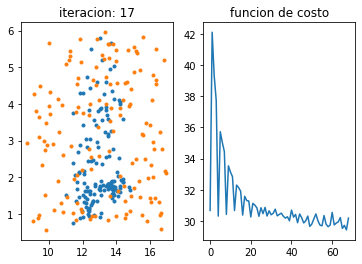

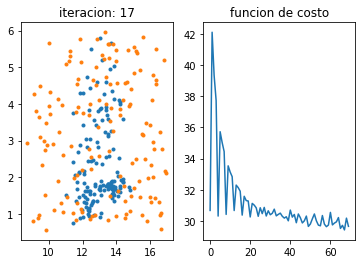

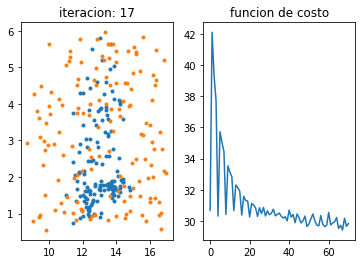

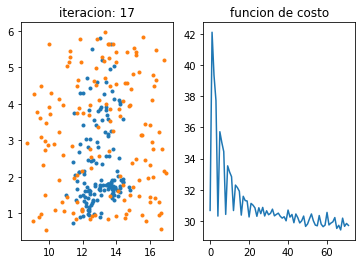

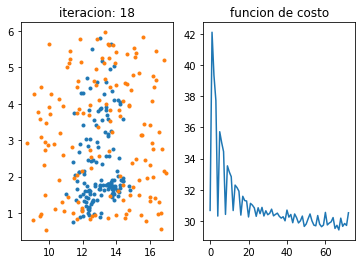

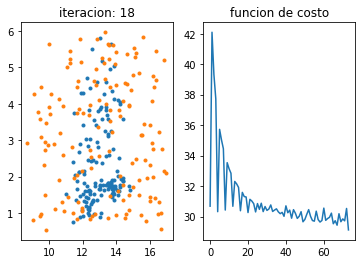

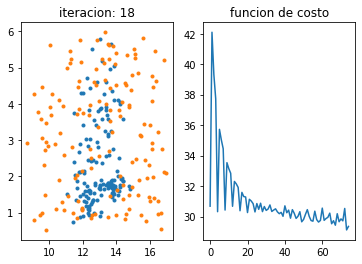

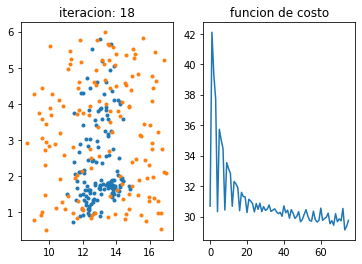

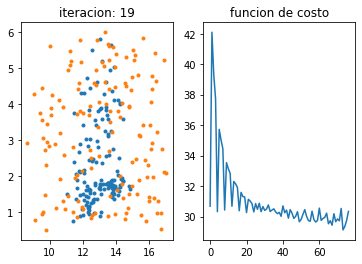

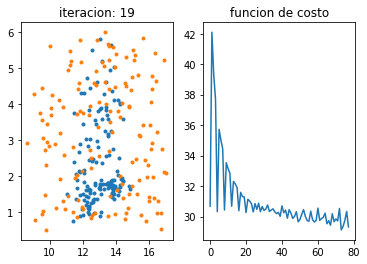

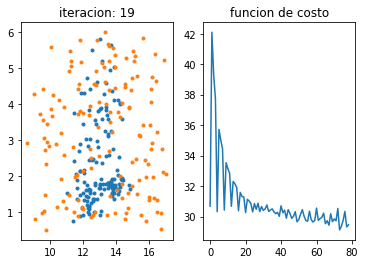

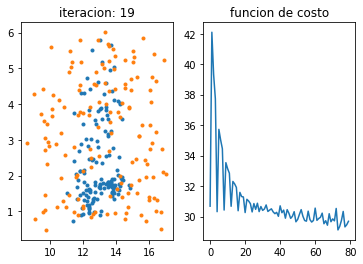

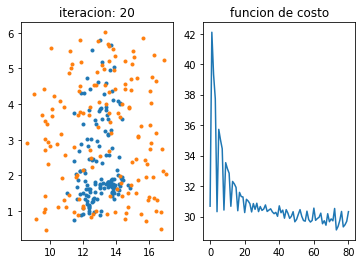

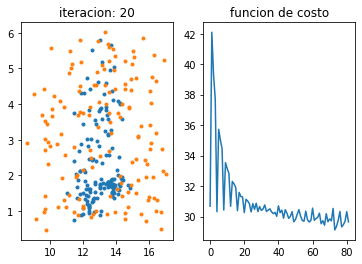

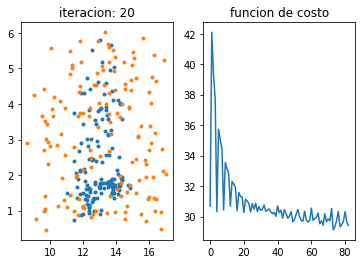

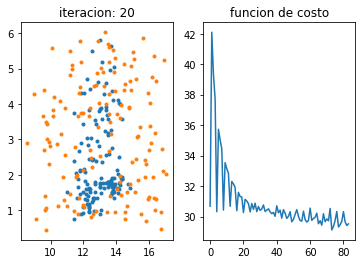

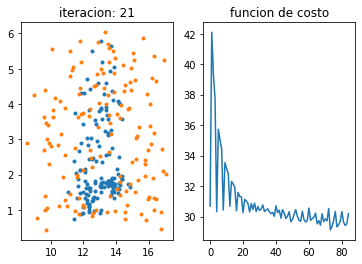

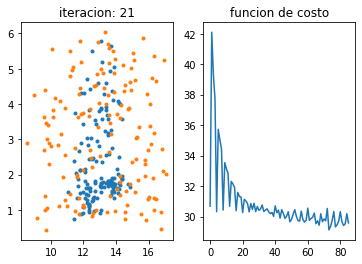

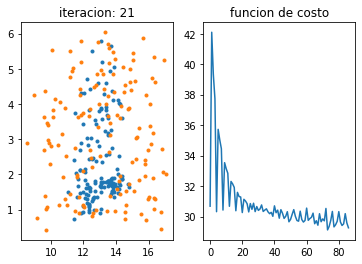

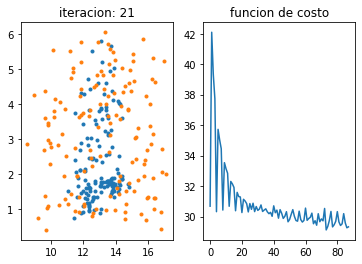

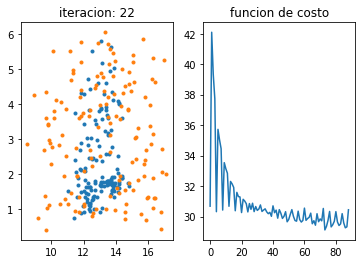

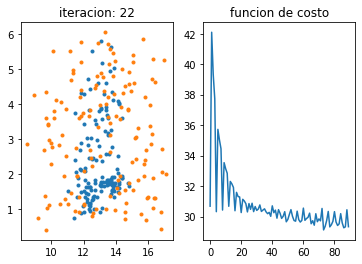

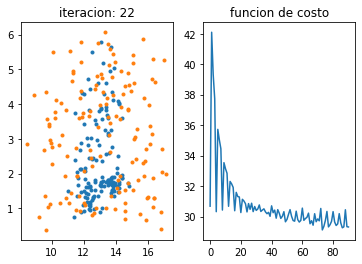

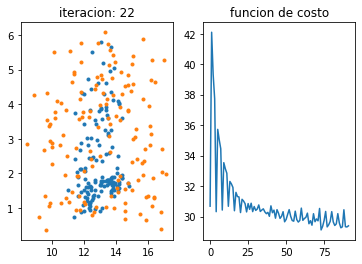

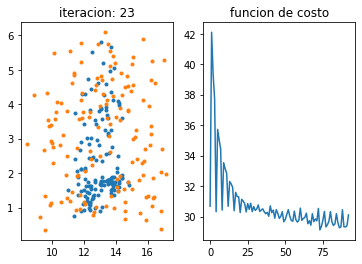

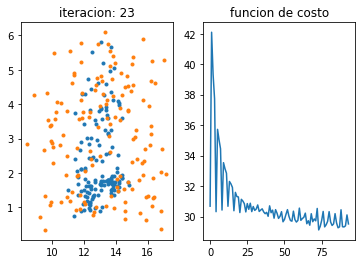

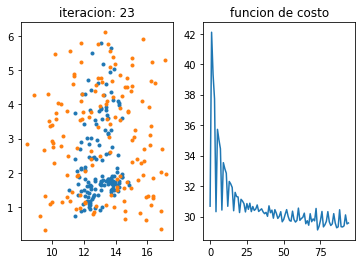

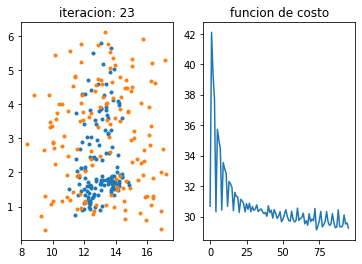

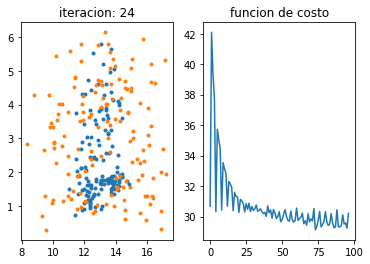

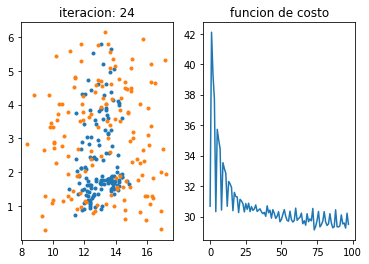

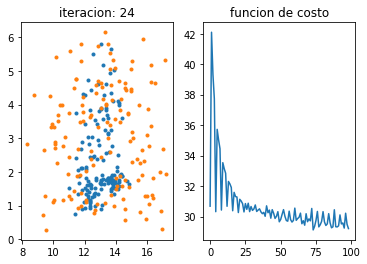

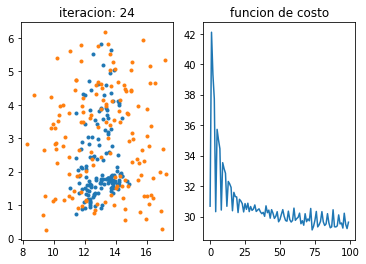

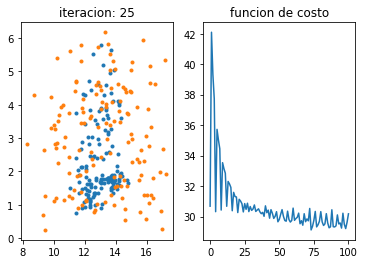

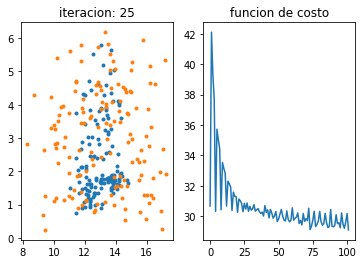

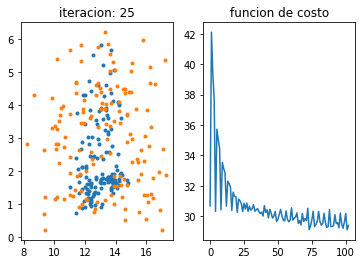

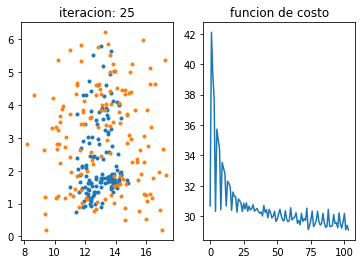

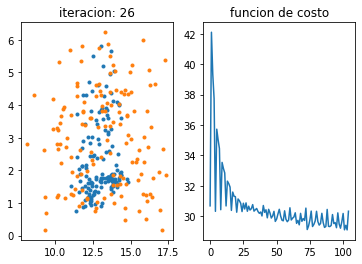

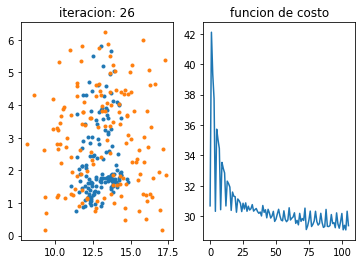

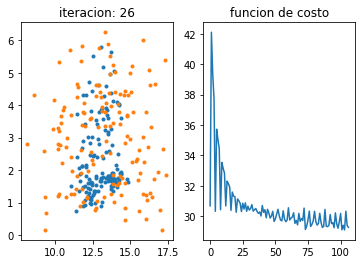

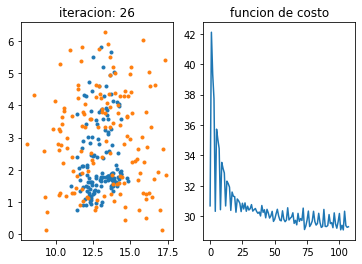

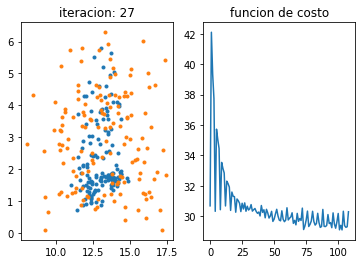

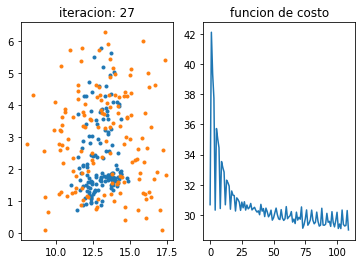

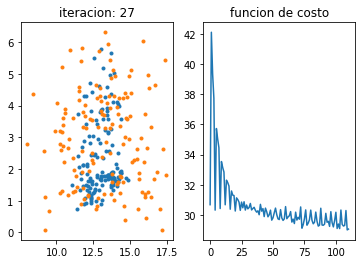

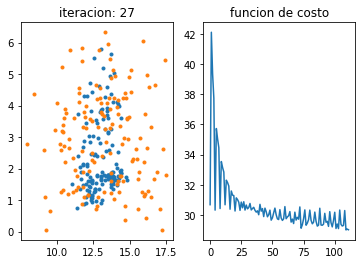

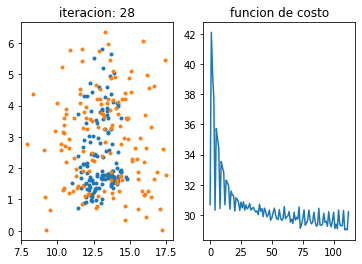

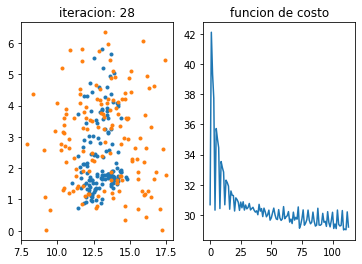

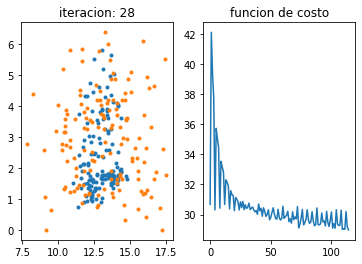

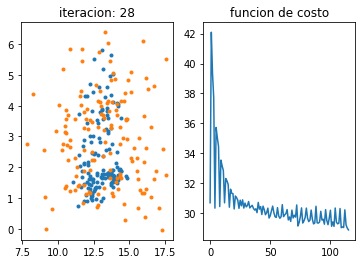

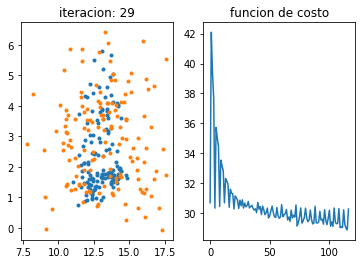

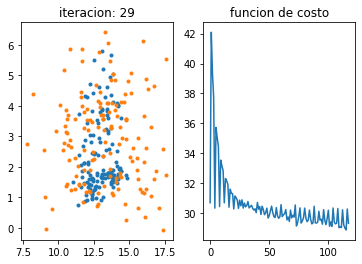

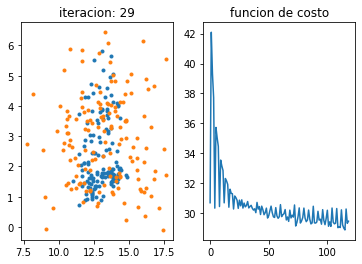

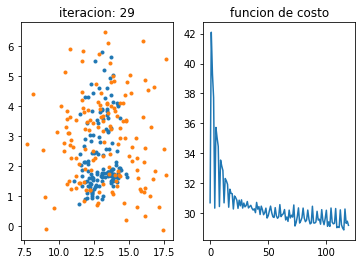

el tiempo requerido fue:39.309640884399414sg
Ari: 0.0 y accuracy: 0.3888888888888889
Jacc: 0.15123456790123457 y Purity: 0.3888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [0]:
t = time.time()
p =MiniBatchPRI(lambda_=3, sigma_initial=30,learning_rate=100.5, reduction_='SC',n_clusters=3,gamma_=10,nn=5,show_process=True)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
# ARI
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
# Accuracy
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
# Jaccard
Rjacc_SGD=jaccard_score(y_test,labels_pre_SGD,average='weighted')
# Purity
Rpuri_SGD=purity_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
print('Jacc: '+str(Rjacc_SGD)+' y'+' Purity: '+str(Rpuri_SGD))